In [178]:
import numpy as np
from scipy.optimize import minimize

# Example data (replace these with actual data)
countries = ['Spain', 'France']  # List of countries
energies = ['Wind', 'Solar']  # List of energy types
n_countries = len(countries)
n_energies = len(energies)
target_CF = 0.35

# Capacity factors (CF) for each country-energy combination (n_countries x n_energies)
CF = np.array([
    [0.35, 0.15],  # Spain: Wind, Solar
    [0.30, 0.18]   # France: Wind, Solar
])

# Max demand for each country (n_countries)
max_demand = np.array([40000, 35000])  # Example demand values

# Initial guess for installed capacities (X), can be set to any positive values (e.g., 1000 MW for each energy)
X_initial = np.ones(n_countries * n_energies)

# Objective function: min sum((X_ij * CF_ij - max_demand_i)^2)
def objective(X):
    energy_produced = CF * X.reshape((n_countries, n_energies))
    return np.sum((energy_produced.sum(axis=1) - max_demand)**2)

# Constraints: X_ij > 0, and X_ij * CF_ij <= max_demand_i
#def constraint(X):
#    energy_produced = CF * X.reshape((n_countries, n_energies))
#    return np.sum(energy_produced, axis=1) - max_demand  # Should be <= 0

# Constraints: X_ij > 0, and sum_{countries i, capacities j} X_{i,j} * (CF_{i, j} - target_CF)
def con_target_CF(X):
    aux = (CF - target_CF) * X.reshape((n_countries, n_energies))
    return np.sum(aux)


# Bounds for X_ij (each capacity should be nonnegative). Constraints: X_ij >= 0
bounds = [(0, None)] * (n_countries * n_energies)

# Constraints dictionary
cons = {'type': 'eq', 'fun': con_target_CF}

# Solve the optimization problem
result = minimize(objective, X_initial, bounds=bounds, constraints=cons)

# Results
if result.success:
    print("Optimization Successful!")
    optimized_X = result.x.reshape((n_countries, n_energies))
    print("Optimized Installed Capacities (X):\n", optimized_X)
else:
    print("Optimization Failed:", result.message)
     


Optimization Successful!
Optimized Installed Capacities (X):
 [[1.14272989e+05 4.33680869e-19]
 [1.13760162e-16 1.07623229e-19]]


In [179]:
import pandas as pd

# Create a pandas DataFrame to display the results in a table
X_df = pd.DataFrame(optimized_X, index=countries, columns=energies)

# Output the results in table format
print("Optimized Installed Capacities (X):")
print(X_df)


Optimized Installed Capacities (X):
                Wind         Solar
Spain   1.142730e+05  4.336809e-19
France  1.137602e-16  1.076232e-19


In [180]:
import pandas as pd

# Load the CSV file
df_cf = pd.read_csv("C:/Users/victoriadx/Desktop/Victoria/01_Studies/TFM/datos/combined_wind_solar.csv")

# Show the data
print(df_cf)


   country      wind     solar
0       AT  0.262142  0.138874
1       BE  0.267975  0.123229
2       BG  0.229612  0.152102
3       CH  0.181843  0.154536
4       CY  0.128839  0.182685
5       CZ  0.224535  0.132392
6       DE  0.208224  0.124481
7       DK  0.290701  0.112339
8       EE  0.244589  0.107070
9       ES  0.266318  0.167618
10      FI  0.318429  0.094531
11      FR  0.246702  0.139732
12      GB  0.328127  0.107295
13      GR  0.258332  0.162161
14      HR  0.139602  0.143328
15      HU  0.244947  0.138762
16      IE  0.294190  0.108380
17      IT  0.195391  0.154945
18      LT  0.270179  0.114290
19      LV  0.250100  0.108267
20      MK  0.108317  0.152432
21      NL  0.257260  0.121964
22      NO  0.278177  0.097846
23      PL  0.247201  0.120561
24      PT  0.270350  0.165973
25      RO  0.242742  0.140802
26      SE  0.264506  0.097583
27      SI  0.085544  0.141062
28      SK  0.149420  0.134736


In [181]:
import pandas as pd
#maximum demand
# Load the CSV file
df_demand = pd.read_csv("C:/Users/victoriadx/Desktop/Victoria/01_Studies/TFM/datos/demand_by_country.csv")

# Show the data
print(df_demand)

   country  demand
0       AT   10833
1       BE   13750
2       BG    7690
3       CH   10437
4       CY    1021
5       CZ   11142
6       DE   92011
7       DK    9618
8       EE    1595
9       ES   41754
10      FI   15105
11      FR   94492
12      GB   71273
13      GR   11034
14      HR    3340
15      HU    7163
16      IT   55157
17      NL   19323
18      IE    7112
19      PL   28304
20      PT    9828
21      LT    2280
22      RO    9728
23      LV    1300
24      SI    2520
25      MK   39352
26      SK    4702
27      NO   25230
28      SE   26714


In [182]:
import numpy as np

# Extract only the numeric columns (excluding 'country')
matrix_CF = df_cf[['wind', 'solar']].to_numpy()
print(matrix_CF)

[[0.26214216 0.13887403]
 [0.26797499 0.12322934]
 [0.22961249 0.15210223]
 [0.18184266 0.15453642]
 [0.12883894 0.18268483]
 [0.22453497 0.1323918 ]
 [0.20822381 0.12448145]
 [0.29070144 0.11233852]
 [0.24458911 0.10706982]
 [0.26631843 0.16761826]
 [0.31842947 0.09453112]
 [0.24670225 0.13973235]
 [0.32812735 0.10729507]
 [0.25833213 0.16216132]
 [0.13960213 0.14332802]
 [0.2449473  0.13876166]
 [0.29418995 0.10838015]
 [0.19539113 0.15494488]
 [0.27017948 0.11429005]
 [0.25010047 0.10826696]
 [0.10831701 0.15243199]
 [0.25725991 0.12196376]
 [0.27817713 0.09784635]
 [0.24720148 0.12056096]
 [0.27035042 0.16597264]
 [0.2427422  0.14080228]
 [0.26450608 0.09758276]
 [0.08554407 0.14106174]
 [0.1494198  0.13473623]]


In [183]:
max_per_column = np.max(matrix_CF, axis=0)
print("Max per column (wind, solar):", max_per_column)

Max per column (wind, solar): [0.32812735 0.18268483]


In [184]:
min_per_column = np.min(matrix_CF, axis=0)
print("Max per column (wind, solar):", min_per_column)

Max per column (wind, solar): [0.08554407 0.09453112]


In [185]:
demand_array = df_demand['demand'].to_numpy()
print(demand_array) #maximum demand

[10833 13750  7690 10437  1021 11142 92011  9618  1595 41754 15105 94492
 71273 11034  3340  7163 55157 19323  7112 28304  9828  2280  9728  1300
  2520 39352  4702 25230 26714]


In [186]:
#to apply real data to the code 

import numpy as np
from scipy.optimize import minimize

# Example data (replace these with actual data)
countries = ['AT', 'BE', 'BG','CH','CY','CZ','DE','DK','EE','ES','FI','FR','GB','GR','HR','HU','IT','NL','IE','PL','PT','LT','RO','LV','SI','MK','SK','NO','SE']  # List of 29 countries 
energies = ['Wind', 'Solar']  # List of energy types
n_countries = len(countries)
n_energies = len(energies)
target_CF = 0.30812735

# Capacity factors (CF) for each country-energy combination (n_countries x n_energies)
CF = matrix_CF

# Max demand for each country (n_countries)
max_demand = demand_array  # max demand 

# Initial guess for installed capacities (X), can be set to any positive values (e.g., 1000 MW for each energy)
X_initial = np.ones(n_countries * n_energies)

# Objective function: min sum((X_ij * CF_ij - max_demand_i)^2)
def objective(X):
    energy_produced = CF * X.reshape((n_countries, n_energies))
    return np.sum((energy_produced.sum(axis=1) - max_demand)**2)

# Constraints: X_ij > 0, and X_ij * CF_ij <= max_demand_i
#def constraint(X):
#    energy_produced = CF * X.reshape((n_countries, n_energies))
#    return np.sum(energy_produced, axis=1) - max_demand  # Should be <= 0

# Constraints: X_ij > 0, and sum_{countries i, capacities j} X_{i,j} * (CF_{i, j} - target_CF)
def con_target_CF(X):
    aux = (CF - target_CF) * X.reshape((n_countries, n_energies))
    return np.sum(aux)


# Bounds for X_ij (each capacity should be nonnegative). Constraints: X_ij >= 0
bounds = [(0, None)] * (n_countries * n_energies)

# Constraints dictionary
cons = {'type': 'eq', 'fun': con_target_CF}

# Solve the optimization problem
#result = minimize(objective, X_initial, bounds=bounds, constraints=cons, options={'maxiter': 100000, 'disp': True})
result = minimize(objective, X_initial, bounds=bounds, constraints=cons, method='trust-constr',
                  options={'maxiter': 1000, 'verbose': 1})

# Results
if result.success:
    print("Optimization Successful!")
    optimized_X = result.x.reshape((n_countries, n_energies))
    print("Optimized Installed Capacities (X):\n", optimized_X)
else:
    print("Optimization Failed:", result.message)


`xtol` termination condition is satisfied.
Number of iterations: 164, function evaluations: 9735, CG iterations: 1330, optimality: 1.19e-03, constraint violation: 6.77e-13, execution time: 0.55 s.
Optimization Successful!
Optimized Installed Capacities (X):
 [[2.30044080e-09 5.16097126e-10]
 [1.98697008e-09 4.72809317e-10]
 [1.14065451e-09 5.51900459e-10]
 [7.07563110e-10 5.75219125e-10]
 [4.75023125e-10 6.78766504e-10]
 [1.10892690e-09 4.95017104e-10]
 [2.17585104e-09 5.80936203e-10]
 [9.68967734e-09 4.36258415e-10]
 [1.34987973e-09 4.25919980e-10]
 [1.48563700e-08 7.23234136e-10]
 [7.88106615e+04 3.94648316e-10]
 [7.13614042e+04 6.35864904e-10]
 [2.74573504e+05 4.11535094e-10]
 [2.09235377e-09 6.06653340e-10]
 [5.06951749e-10 5.16992422e-10]
 [1.46323978e-09 5.09622813e-10]
 [1.37759112e+05 4.35724077e-10]
 [8.35587658e-10 5.92494058e-10]
 [1.91243682e-09 4.46296083e-10]
 [2.38109098e-09 4.48964402e-10]
 [4.34747546e-10 5.56132330e-10]
 [1.76916552e-09 4.49795072e-10]
 [4.02482554e-0

C:\Users\victoriadx\Anaconda3\lib\site-packages\scipy\optimize\_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


In [187]:
#Data frame format 

import pandas as pd

# Create a pandas DataFrame to display the results in a table
X_df_new = pd.DataFrame(optimized_X, index=countries, columns=energies)

# Output the results in table format
print("Optimized Installed Capacities (X):")
print(X_df_new)

Optimized Installed Capacities (X):
            Wind         Solar
AT  2.300441e-09  5.160971e-10
BE  1.986970e-09  4.728093e-10
BG  1.140655e-09  5.519005e-10
CH  7.075631e-10  5.752191e-10
CY  4.750231e-10  6.787665e-10
CZ  1.108927e-09  4.950171e-10
DE  2.175851e-09  5.809362e-10
DK  9.689677e-09  4.362584e-10
EE  1.349880e-09  4.259200e-10
ES  1.485637e-08  7.232341e-10
FI  7.881066e+04  3.946483e-10
FR  7.136140e+04  6.358649e-10
GB  2.745735e+05  4.115351e-10
GR  2.092354e-09  6.066533e-10
HR  5.069517e-10  5.169924e-10
HU  1.463240e-09  5.096228e-10
IT  1.377591e+05  4.357241e-10
NL  8.355877e-10  5.924941e-10
IE  1.912437e-09  4.462961e-10
PL  2.381091e-09  4.489644e-10
PT  4.347475e-10  5.561323e-10
LT  1.769166e-09  4.497951e-10
RO  4.024826e-09  4.109725e-10
LV  1.442975e-09  4.556258e-10
SI  2.374627e-09  6.031845e-10
MK  1.376808e-09  5.717673e-10
SK  2.186641e-09  4.090491e-10
NO  3.949964e-10  5.463819e-10
SE  5.868435e-10  5.289367e-10


In [188]:
#Objective function print is added (Absolute value)

if result.success:
    print("Optimization Successful!")
    optimized_X = result.x.reshape((n_countries, n_energies))
    print("Optimized Installed Capacities (X):\n", optimized_X)

    # Calculate and print the objective function result per country
    energy_produced = CF * optimized_X
    error_per_country = (energy_produced.sum(axis=1) - max_demand)**2
    rmse_per_country = np.sqrt(error_per_country)

    print("\nObjective function value per country (RMSE):")
    for i, country in enumerate(countries):
        print(f"{country}: {rmse_per_country[i]:,.2f}")

    total_obj = np.sum(rmse_per_country)
    print(f"\nTotal Objective Function Value (sum of rmse errors): {total_obj:,.2f}")

else:
    print("Optimization Failed:", result.message)

Optimization Successful!
Optimized Installed Capacities (X):
 [[2.30044080e-09 5.16097126e-10]
 [1.98697008e-09 4.72809317e-10]
 [1.14065451e-09 5.51900459e-10]
 [7.07563110e-10 5.75219125e-10]
 [4.75023125e-10 6.78766504e-10]
 [1.10892690e-09 4.95017104e-10]
 [2.17585104e-09 5.80936203e-10]
 [9.68967734e-09 4.36258415e-10]
 [1.34987973e-09 4.25919980e-10]
 [1.48563700e-08 7.23234136e-10]
 [7.88106615e+04 3.94648316e-10]
 [7.13614042e+04 6.35864904e-10]
 [2.74573504e+05 4.11535094e-10]
 [2.09235377e-09 6.06653340e-10]
 [5.06951749e-10 5.16992422e-10]
 [1.46323978e-09 5.09622813e-10]
 [1.37759112e+05 4.35724077e-10]
 [8.35587658e-10 5.92494058e-10]
 [1.91243682e-09 4.46296083e-10]
 [2.38109098e-09 4.48964402e-10]
 [4.34747546e-10 5.56132330e-10]
 [1.76916552e-09 4.49795072e-10]
 [4.02482554e-09 4.10972545e-10]
 [1.44297513e-09 4.55625834e-10]
 [2.37462728e-09 6.03184545e-10]
 [1.37680776e-09 5.71767325e-10]
 [2.18664132e-09 4.09049147e-10]
 [3.94996426e-10 5.46381883e-10]
 [5.86843496e-

In [189]:
# dinamic target CF 
import numpy as np
from scipy.optimize import minimize

# Example data (replace with actual data)
countries = ['AT', 'BE', 'BG','CH','CY','CZ','DE','DK','EE','ES','FI','FR','GB','GR','HR','HU','IT','NL','IE','PL','PT','LT','RO','LV','SI','MK','SK','NO','SE']
energies = ['Wind', 'Solar']
n_countries = len(countries)
n_energies = len(energies)

# Replace these with your actual data
CF = matrix_CF                     # Shape: (n_countries, n_energies)
max_demand = demand_array          # Shape: (n_countries,)
X_initial = np.ones(n_countries * n_energies)

# Define bounds
bounds = [(0, None)] * (n_countries * n_energies)

# Loop over target CFs from 0.18 to 0.32 in steps of 0.02
target_CFs = np.arange(0.18268483, 0.32812735, 0.02)  # includes 0.32

for target_CF in target_CFs:
    print(f"\n{'='*60}\nTarget Capacity Factor: {target_CF:.2f}\n{'='*60}")

    # Define constraint function dynamically for each target_CF
    def con_target_CF(X):
        aux = (CF - target_CF) * X.reshape((n_countries, n_energies))
        return np.sum(aux)

    cons = {'type': 'eq', 'fun': con_target_CF}

    # Define objective function
    def objective(X):
        energy_produced = CF * X.reshape((n_countries, n_energies))
        return np.sum((energy_produced.sum(axis=1) - max_demand)**2)

    # Run optimization
    result = minimize(objective, X_initial, bounds=bounds, constraints=cons, method='trust-constr',
                      options={'maxiter': 1000, 'verbose': 0})

    if result.success:
        optimized_X = result.x.reshape((n_countries, n_energies))
        print("Optimization Successful!")
        print("Optimized Installed Capacities (MW):")
        for i, country in enumerate(countries):
            wind = optimized_X[i, 0]
            solar = optimized_X[i, 1]
            print(f"{country}: Wind = {wind:.2f}, Solar = {solar:.2f}")

        # Calculate RMSE per country
        energy_produced = CF * optimized_X
        error_per_country = (energy_produced.sum(axis=1) - max_demand)**2
        rmse_per_country = np.sqrt(error_per_country)

        print("\nObjective Function Value per Country (RMSE):")
        for i, country in enumerate(countries):
            print(f"{country}: {rmse_per_country[i]:,.2f}")

        total_obj = np.sum(rmse_per_country)
        print(f"\nTotal Objective Function Value (Sum of RMSE): {total_obj:,.2f}")
    else:
        print("Optimization Failed:", result.message)




Target Capacity Factor: 0.18
Optimization Failed: The maximum number of function evaluations is exceeded.

Target Capacity Factor: 0.20


C:\Users\victoriadx\Anaconda3\lib\site-packages\scipy\optimize\_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


Optimization Successful!
Optimized Installed Capacities (MW):
AT: Wind = 31342.44, Solar = 18843.16
BE: Wind = 49289.48, Solar = 4395.48
BG: Wind = 33122.19, Solar = 557.07
CH: Wind = 32370.99, Solar = 29446.60
CY: Wind = 1772.02, Solar = 4339.14
CZ: Wind = 39402.50, Solar = 17333.10
DE: Wind = 326240.69, Solar = 193441.83
DK: Wind = 29751.22, Solar = 8628.18
EE: Wind = 4884.13, Solar = 3739.57
ES: Wind = 121492.33, Solar = 56069.98
FI: Wind = 46452.66, Solar = 3312.18
FR: Wind = 296711.32, Solar = 152381.68
GB: Wind = 202621.08, Solar = 44619.77
GR: Wind = 21557.71, Solar = 33700.70
HR: Wind = 11743.31, Solar = 11865.15
HU: Wind = 16914.75, Solar = 21762.34
IT: Wind = 178804.70, Solar = 23569.41
NL: Wind = 57600.92, Solar = 52072.01
IE: Wind = 21481.43, Solar = 11445.95
PL: Wind = 98007.38, Solar = 35027.38
PT: Wind = 20799.50, Solar = 49694.69
LT: Wind = 5812.14, Solar = 6434.45
RO: Wind = 34587.47, Solar = 1089.03
LV: Wind = 106.62, Solar = 10564.31
SI: Wind = 2194.57, Solar = 11608

In [230]:
#max demand analysis
import numpy as np
import pandas as pd
from scipy.optimize import minimize

countries = ['AT', 'BE', 'BG','CH','CY','CZ','DE','DK','EE','ES','FI','FR','GB','GR','HR','HU','IT','NL','IE','PL','PT','LT','RO','LV','SI','MK','SK','NO','SE']
energies = ['Wind', 'Solar']
n_countries = len(countries)
n_energies = len(energies)

# Replace these with your actual data
CF = matrix_CF               # Shape: (n_countries, n_energies)
max_demand = demand_array    # Shape: (n_countries,)
X_initial = np.ones(n_countries * n_energies)

bounds = [(0, None)] * (n_countries * n_energies)
target_CFs = np.arange(0.08554407, 0.34812735, 0.08)

all_results = []

for target_CF in target_CFs:
    print(f"\n{'='*60}\nTarget Capacity Factor: {target_CF:.2f}\n{'='*60}")

    def con_target_CF(X):
        aux = (CF - target_CF) * X.reshape((n_countries, n_energies))
        return np.sum(aux)

    cons = {'type': 'eq', 'fun': con_target_CF}

    def objective(X):
        energy_produced = CF * X.reshape((n_countries, n_energies))
        return np.sum((energy_produced.sum(axis=1) - max_demand)**2)

    result = minimize(objective, X_initial, bounds=bounds, constraints=cons, method='trust-constr',
                      options={'maxiter': 2000,'verbose': 0}  
                     )
    if result.success:
        optimized_X = result.x.reshape((n_countries, n_energies))
        print("Optimization Successful!")
        print("Optimized Installed Capacities (MW):")
        for i, country in enumerate(countries):
            wind = optimized_X[i, 0]
            solar = optimized_X[i, 1]
            print(f"{country}: Wind = {wind:.2f}, Solar = {solar:.2f}")

        energy_produced = CF * optimized_X
        error_per_country = (energy_produced.sum(axis=1) - max_demand)**2
        rmse_per_country = np.sqrt(error_per_country)

        print("\nObjective Function Value per Country (RMSE):")
        for i, country in enumerate(countries):
            print(f"{country}: {rmse_per_country[i]:,.2f}")

        df_result = pd.DataFrame({
            'country': countries,
            'target_cf': [target_CF] * n_countries,
            'rmse': rmse_per_country
        })
        all_results.append(df_result)
    else:
        print("Optimization Failed:", result.message)

df_all_results = pd.concat(all_results, ignore_index=True)
print("\nCombined Results DataFrame:")
print(df_all_results)

# Uncomment if you want to save the results
# df_all_results.to_csv("rmse_vs_target_cf_by_country.csv", index=False)



Target Capacity Factor: 0.09


C:\Users\victoriadx\Anaconda3\lib\site-packages\scipy\optimize\_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


Optimization Successful!
Optimized Installed Capacities (MW):
AT: Wind = 0.00, Solar = 0.00
BE: Wind = 0.00, Solar = 0.00
BG: Wind = 0.00, Solar = 0.00
CH: Wind = 0.00, Solar = 0.00
CY: Wind = 0.00, Solar = 0.00
CZ: Wind = 0.00, Solar = 0.00
DE: Wind = 0.00, Solar = 0.00
DK: Wind = 0.00, Solar = 0.00
EE: Wind = 0.00, Solar = 0.00
ES: Wind = 0.00, Solar = 0.00
FI: Wind = 0.00, Solar = 0.00
FR: Wind = 0.00, Solar = 0.00
GB: Wind = 0.00, Solar = 0.04
GR: Wind = 0.00, Solar = 0.00
HR: Wind = 0.00, Solar = 0.00
HU: Wind = 0.00, Solar = 0.00
IT: Wind = 0.00, Solar = 0.00
NL: Wind = 0.00, Solar = 0.00
IE: Wind = 0.00, Solar = 0.00
PL: Wind = 0.00, Solar = 0.00
PT: Wind = 0.00, Solar = 0.00
LT: Wind = 0.00, Solar = 0.00
RO: Wind = 0.00, Solar = 0.00
LV: Wind = 0.00, Solar = 0.00
SI: Wind = 0.00, Solar = 0.00
MK: Wind = 0.00, Solar = 0.00
SK: Wind = 0.00, Solar = 0.00
NO: Wind = 294935.83, Solar = 0.00
SE: Wind = 0.00, Solar = 0.00

Objective Function Value per Country (RMSE):
AT: 10,833.00
BE:

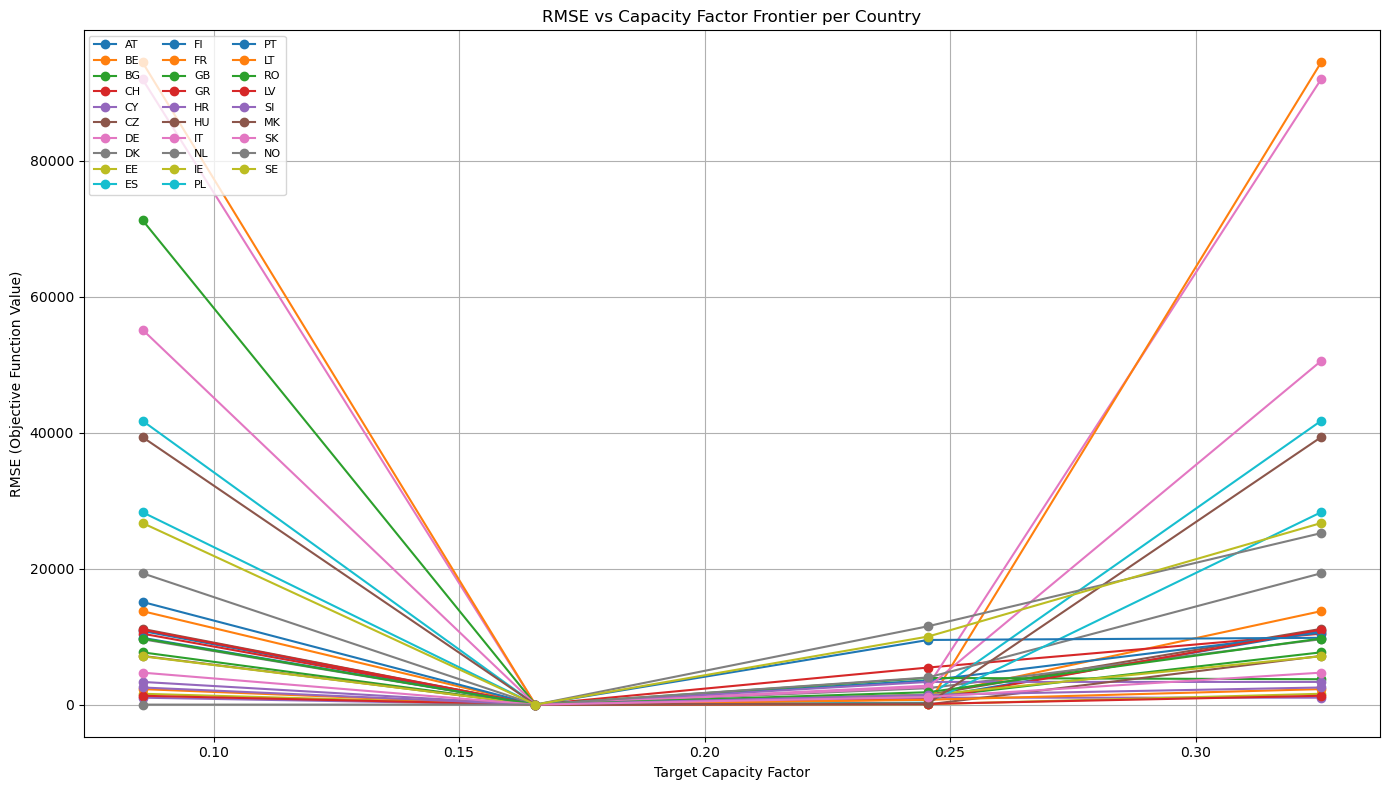

In [233]:
import pandas as pd
import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(14, 8))

for country in df_all_results['country'].unique():
    subset = df_all_results[df_all_results['country'] == country]
    plt.plot(subset['target_cf'], subset['rmse'], marker='o', label=country)

plt.xlabel("Target Capacity Factor")
plt.ylabel("RMSE (Objective Function Value)")
plt.title("RMSE vs Capacity Factor Frontier per Country")
plt.legend(ncol=3, fontsize=8, loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


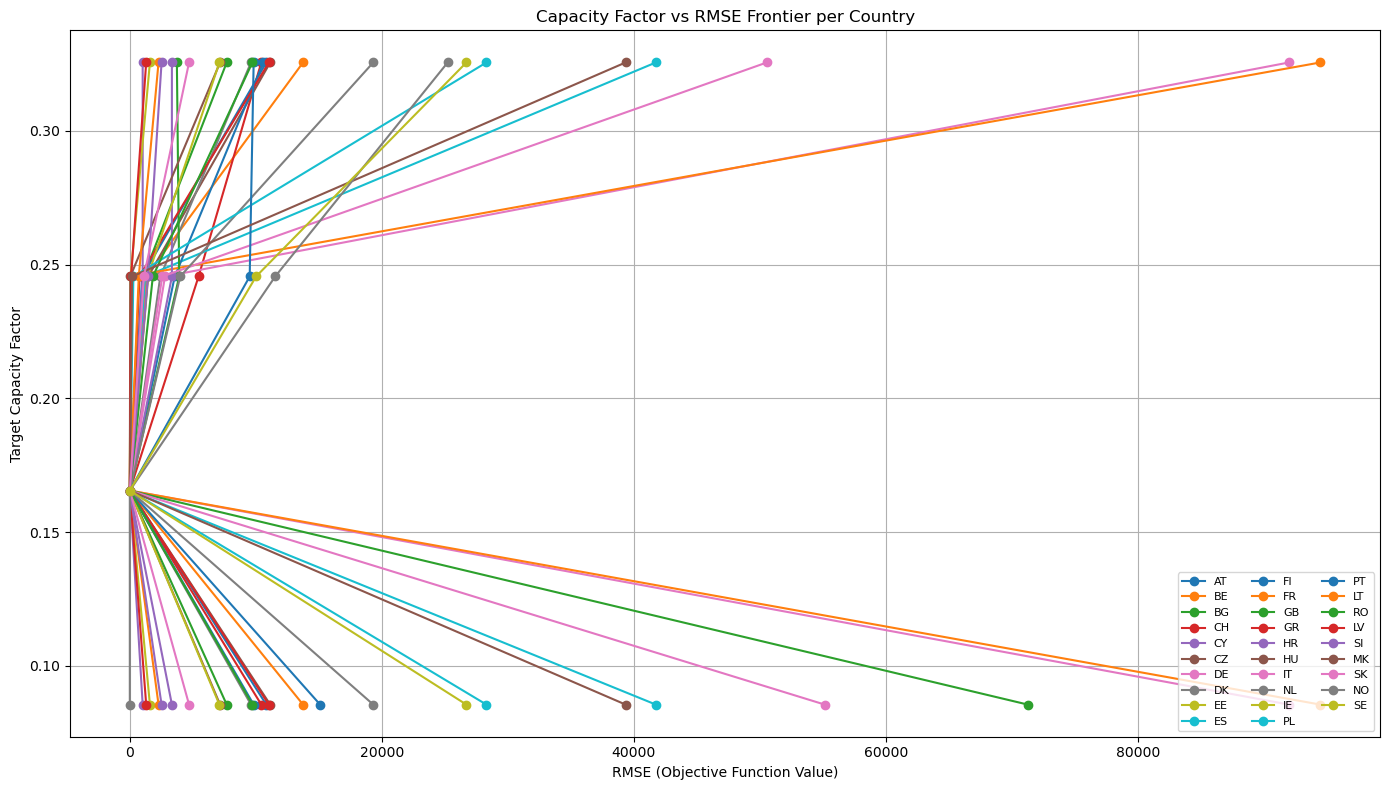

In [234]:
import pandas as pd
import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(14, 8))

for country in df_all_results['country'].unique():
    subset = df_all_results[df_all_results['country'] == country]
    plt.plot(subset['rmse'], subset['target_cf'], marker='o', label=country)

plt.xlabel("RMSE (Objective Function Value)")
plt.ylabel("Target Capacity Factor")
plt.title("Capacity Factor vs RMSE Frontier per Country")
plt.legend(ncol=3, fontsize=8, loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


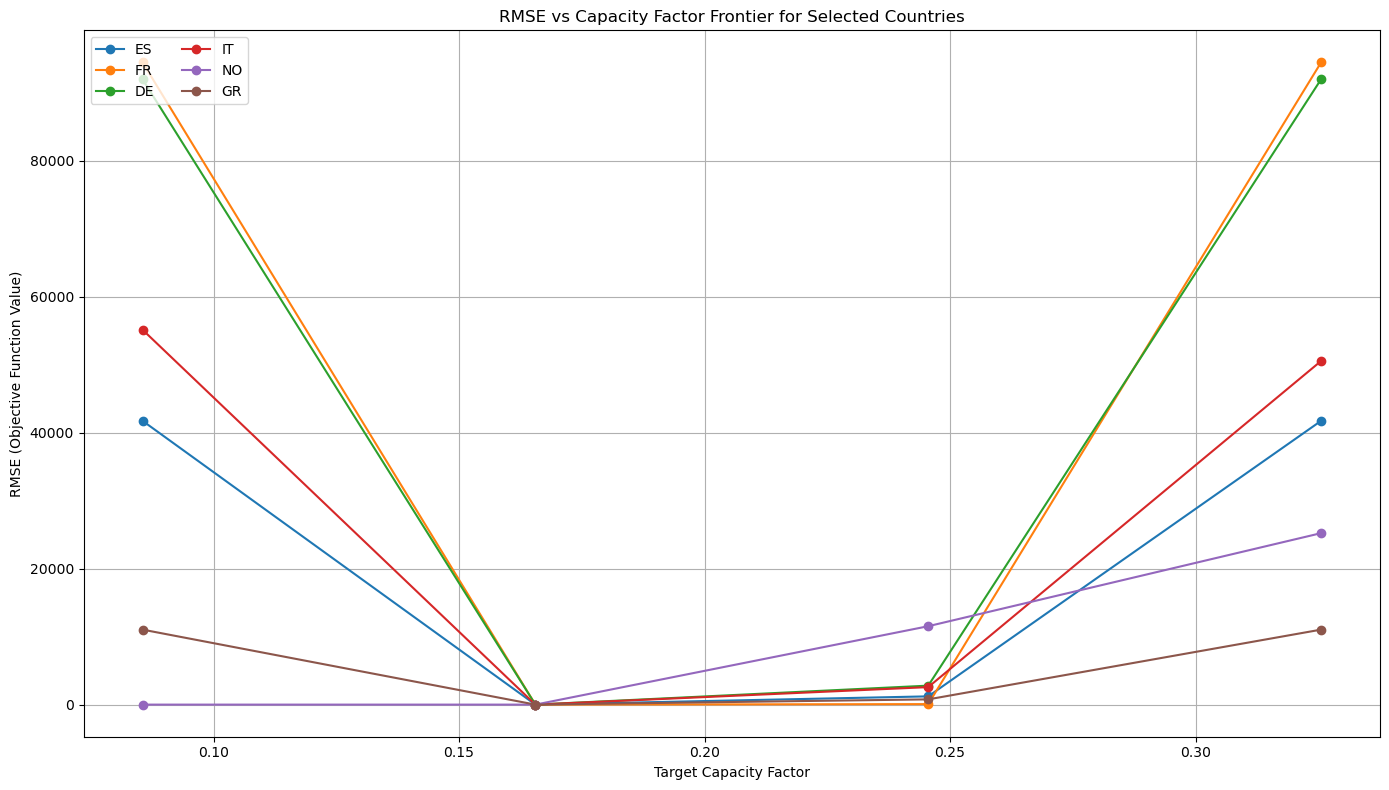

In [235]:
import pandas as pd
import matplotlib.pyplot as plt

# List of countries you want to include
selected_countries = ['ES', 'FR', 'DE', 'IT', 'NO', 'GR']  # <- change these to your preferred countries

# Plot
plt.figure(figsize=(14, 8))

for country in selected_countries:
    subset = df_all_results[df_all_results['country'] == country]
    plt.plot(subset['target_cf'], subset['rmse'], marker='o', label=country)

plt.xlabel("Target Capacity Factor")
plt.ylabel("RMSE (Objective Function Value)")
plt.title("RMSE vs Capacity Factor Frontier for Selected Countries")
plt.legend(ncol=2, fontsize=10, loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


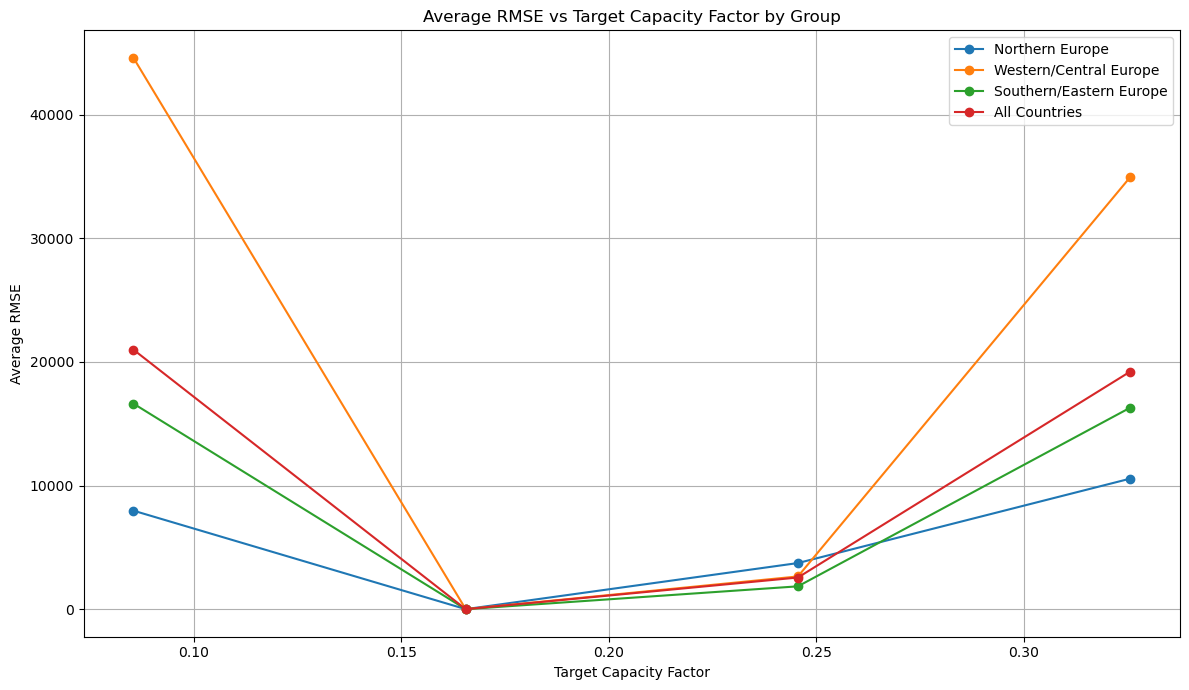

In [236]:
import pandas as pd
import matplotlib.pyplot as plt

# Define groups
group_1 = ['DK','EE','FI','IE','LT','LV','NO','SE']  # Northern
group_2 = ['AT','BE','CH','DE','FR','NL','GB']       # Western/Central
group_3 = ['BG','CY','CZ','ES','GR','HR','HU','IT','MK','PL','PT','RO','SI','SK']  # Southern/Eastern
group_4 = list(df_all_results['country'].unique())    # All countries

# Group mapping
group_mapping = {
    'Northern Europe': group_1,
    'Western/Central Europe': group_2,
    'Southern/Eastern Europe': group_3,
    'All Countries': group_4
}

# Container for aggregated results
group_agg = []

# Aggregate RMSE per target CF per group
for group_name, countries in group_mapping.items():
    subset = df_all_results[df_all_results['country'].isin(countries)]
    agg = subset.groupby('target_cf')['rmse'].mean().reset_index()
    agg['group'] = group_name
    group_agg.append(agg)
import pandas as pd
import matplotlib.pyplot as plt

# Define groups
group_1 = ['DK','EE','FI','IE','LT','LV','NO','SE']  # Northern
group_2 = ['AT','BE','CH','DE','FR','NL','GB']       # Western/Central
group_3 = ['BG','CY','CZ','ES','GR','HR','HU','IT','MK','PL','PT','RO','SI','SK']  # Southern/Eastern
group_4 = list(df_all_results['country'].unique())    # All countries

# Group mapping
group_mapping = {
    'Northern Europe': group_1,
    'Western/Central Europe': group_2,
    'Southern/Eastern Europe': group_3,
    'All Countries': group_4
}

# Container for aggregated results
group_agg = []

# Aggregate RMSE per target CF per group
for group_name, countries in group_mapping.items():
    subset = df_all_results[df_all_results['country'].isin(countries)]
    agg = subset.groupby('target_cf')['rmse'].mean().reset_index()
    agg['group'] = group_name
    group_agg.append(agg)

# Combine into single DataFrame
df_group_agg = pd.concat(group_agg, ignore_index=True)

# Plotting
plt.figure(figsize=(12, 7))
for group in df_group_agg['group'].unique():
    group_data = df_group_agg[df_group_agg['group'] == group]
    plt.plot(group_data['target_cf'], group_data['rmse'], marker='o', label=group)

plt.xlabel("Target Capacity Factor")
plt.ylabel("Average RMSE")
plt.title("Average RMSE vs Target Capacity Factor by Group")
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.savefig("C:/Users/victoriadx/Desktop/Victoria/01_Studies/TFM/datos/figures/rmse_cf_by group_boxplot.png", dpi=300, bbox_inches='tight')
plt.show()


In [195]:
import pandas as pd

# Load the Excel file (update the path with your actual file path)
df = pd.read_excel('C:/Users/victoriadx/Desktop/Victoria/01_Studies/TFM/datos/LCOE_info.xlsx')

# Preview the data
print(df.head())


      tech country   LCOE
0  Onshore      DK  0.043
1  Onshore      FR  0.048
2  Onshore      DE  0.053
3  Onshore      IT  0.050
4  Onshore      ES  0.036


In [196]:
# Replace commas with dots and convert to float
df['LCOE'] = df['LCOE'].astype(str).str.replace(',', '.').astype(float)


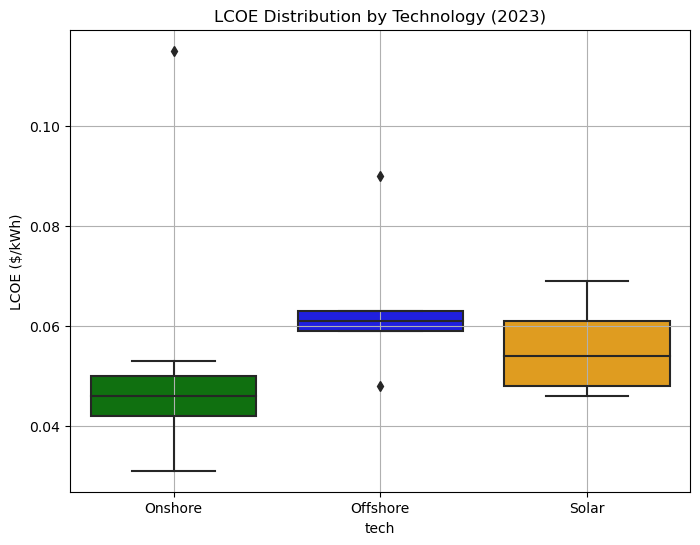

In [197]:
import matplotlib.pyplot as plt
import seaborn as sns

# Clean column names
df.columns = df.columns.str.strip()

# Define updated color palette
custom_palette = {
    'Onshore': 'green',
    'Offshore': 'blue',
    'Solar': 'orange'
}

plt.figure(figsize=(8, 6))
sns.boxplot(x='tech', y='LCOE', data=df, palette=custom_palette)
plt.title("LCOE Distribution by Technology (2023)")
plt.ylabel("LCOE ($/kWh)")
plt.grid(True)

plt.savefig("C:/Users/victoriadx/Desktop/Victoria/01_Studies/TFM/datos/figures/lcoe_boxplot.png", dpi=300, bbox_inches='tight')

plt.show()

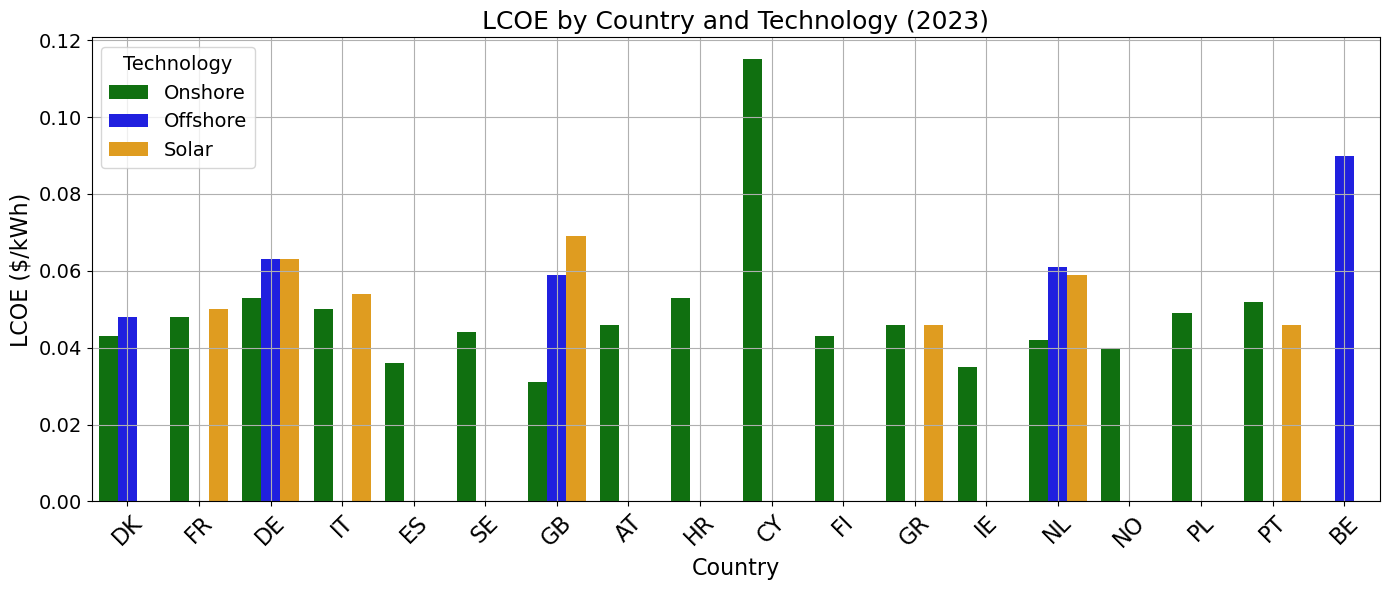

In [198]:
plt.figure(figsize=(14, 6))
sns.barplot(x='country', y='LCOE', hue='tech', data=df, palette=custom_palette)
plt.title("LCOE by Country and Technology (2023)", fontsize=18)
plt.ylabel("LCOE ($/kWh)", fontsize=16)
plt.xlabel("Country", fontsize=16)
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=14)
plt.legend(title="Technology", fontsize=14, title_fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.savefig("C:/Users/victoriadx/Desktop/Victoria/01_Studies/TFM/datos/figures/lcoe_boxplot_country_tech.png", dpi=300, bbox_inches='tight')
plt.show()


In [199]:
print(df.groupby('tech')['LCOE'].describe())

          count      mean       std    min    25%    50%    75%    max
tech                                                                  
Offshore    5.0  0.064200  0.015547  0.048  0.059  0.061  0.063  0.090
Onshore    17.0  0.048588  0.018252  0.031  0.042  0.046  0.050  0.115
Solar       7.0  0.055286  0.008789  0.046  0.048  0.054  0.061  0.069


In [200]:
import pandas as pd

# Load Excel file
file_path = "C:/Users/victoriadx/Desktop/Victoria/01_Studies/TFM/datos/LCOE_info.xlsx"  
df = pd.read_excel(file_path)

# Clean column names if needed
df.columns = df.columns.str.strip()

# Ensure LCOE is float
df["LCOE"] = df["LCOE"].astype(float)

# === 1. Average LCOE per Technology ===
avg_lcoe_by_tech = df.groupby("tech")["LCOE"].mean().reset_index().sort_values("LCOE")
print("\n✅ Average LCOE by Technology:")
print(avg_lcoe_by_tech)

# === 2. Lowest and Highest LCOE per Tech ===
min_lcoe_by_tech = df.loc[df.groupby("tech")["LCOE"].idxmin()][["tech", "country", "LCOE"]]
max_lcoe_by_tech = df.loc[df.groupby("tech")["LCOE"].idxmax()][["tech", "country", "LCOE"]]

print("\n✅ Lowest LCOE per Technology:")
print(min_lcoe_by_tech)

print("\n✅ Highest LCOE per Technology:")
print(max_lcoe_by_tech)

# === 3. Identify most cost-effective tech per country ===
best_tech_per_country = df.loc[df.groupby("country")["LCOE"].idxmin()].sort_values("LCOE")
print("\n✅ Most Cost-Effective Technology per Country:")
print(best_tech_per_country[["country", "tech", "LCOE"]])

# === 4. Compare Onshore, Offshore, and Solar if available ===
pivot_df = df.pivot(index="country", columns="tech", values="LCOE")
pivot_df["cheapest_tech"] = pivot_df.idxmin(axis=1)

print("\n✅ Cheapest Technology by Country (with comparison):")
print(pivot_df[["Onshore", "Offshore", "Solar", "cheapest_tech"]].dropna(how='all'))

# === 5. Summary Conclusion: Is offshore always more expensive? ===
offshore_vs_others = pivot_df.dropna(subset=["Onshore", "Offshore"])
offshore_more_expensive = (offshore_vs_others["Offshore"] > offshore_vs_others[["Onshore", "Solar"]].min(axis=1)).all()

print("\n✅ Is Offshore always more expensive than Onshore and Solar?")
print("Yes ✅" if offshore_more_expensive else "No ❌")



✅ Average LCOE by Technology:
       tech      LCOE
1   Onshore  0.048588
2     Solar  0.055286
0  Offshore  0.064200

✅ Lowest LCOE per Technology:
        tech country   LCOE
18  Offshore      DK  0.048
6    Onshore      GB  0.031
22     Solar      GR  0.046

✅ Highest LCOE per Technology:
        tech country   LCOE
17  Offshore      BE  0.090
9    Onshore      CY  0.115
25     Solar      GB  0.069

✅ Most Cost-Effective Technology per Country:
   country      tech   LCOE
6       GB   Onshore  0.031
12      IE   Onshore  0.035
4       ES   Onshore  0.036
14      NO   Onshore  0.040
13      NL   Onshore  0.042
0       DK   Onshore  0.043
10      FI   Onshore  0.043
5       SE   Onshore  0.044
26      PT     Solar  0.046
11      GR   Onshore  0.046
7       AT   Onshore  0.046
1       FR   Onshore  0.048
15      PL   Onshore  0.049
3       IT   Onshore  0.050
8       HR   Onshore  0.053
2       DE   Onshore  0.053
17      BE  Offshore  0.090
9       CY   Onshore  0.115

✅ Cheapest Tec

In [201]:
#to Estimate Potential LCOE Savings

import pandas as pd

# Load your Excel
file_path = "C:/Users/victoriadx/Desktop/Victoria/01_Studies/TFM/datos/LCOE_info.xlsx"  # ← Update your path
df = pd.read_excel(file_path)
df.columns = df.columns.str.strip()
df["LCOE"] = df["LCOE"].astype(float)

# Find the cheapest LCOE per country
cheapest_per_country = df.loc[df.groupby("country")["LCOE"].idxmin()]
cheapest_per_country = cheapest_per_country.rename(columns={"tech": "cheapest_tech", "LCOE": "LCOE_cheapest"})

# Merge to get each country's cheapest LCOE with all techs
df = df.merge(cheapest_per_country[["country", "cheapest_tech", "LCOE_cheapest"]], on="country")

# Calculate potential savings
df["potential_savings"] = df["LCOE"] - df["LCOE_cheapest"]
df["savings_possible"] = df["tech"] != df["cheapest_tech"]

# Filter only countries where savings are possible
savings_df = df[df["savings_possible"]].sort_values("potential_savings", ascending=False)

print("\n💡 Potential LCOE Savings by Switching Technology:")
print(savings_df[["country", "tech", "LCOE", "cheapest_tech", "LCOE_cheapest", "potential_savings"]])



💡 Potential LCOE Savings by Switching Technology:
   country      tech   LCOE cheapest_tech  LCOE_cheapest  potential_savings
13      GB     Solar  0.069       Onshore          0.031              0.038
12      GB  Offshore  0.059       Onshore          0.031              0.028
22      NL  Offshore  0.061       Onshore          0.042              0.019
23      NL     Solar  0.059       Onshore          0.042              0.017
5       DE  Offshore  0.063       Onshore          0.053              0.010
6       DE     Solar  0.063       Onshore          0.053              0.010
26      PT   Onshore  0.052         Solar          0.046              0.006
1       DK  Offshore  0.048       Onshore          0.043              0.005
8       IT     Solar  0.054       Onshore          0.050              0.004
3       FR     Solar  0.050       Onshore          0.048              0.002
19      GR     Solar  0.046       Onshore          0.046              0.000


🔝 Top 10 Technology Switch Opportunities (by LCOE savings in €/kWh):
   country      tech   lcoe  min_lcoe  savings
13      GB     Solar  0.069     0.031    0.038
22      NL  Offshore  0.061     0.042    0.019
5       DE  Offshore  0.063     0.053    0.010
26      PT   Onshore  0.052     0.046    0.006
1       DK  Offshore  0.048     0.043    0.005
8       IT     Solar  0.054     0.050    0.004
3       FR     Solar  0.050     0.048    0.002


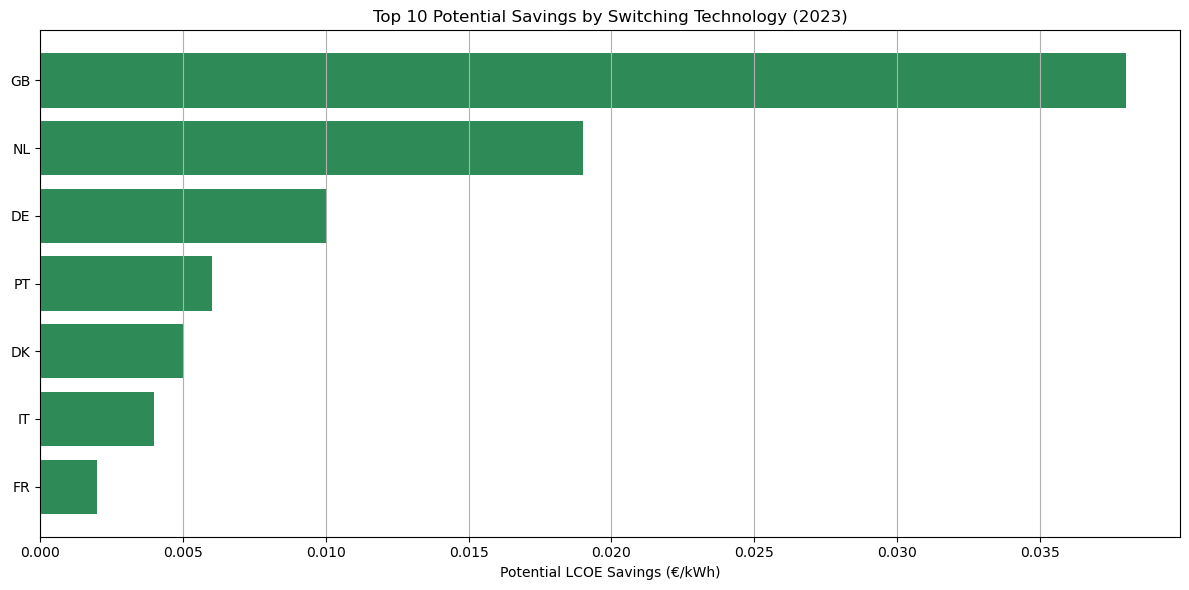

In [202]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data (adjust the path if needed)
df = pd.read_excel("C:/Users/victoriadx/Desktop/Victoria/01_Studies/TFM/datos/LCOE_info.xlsx")

# Clean column names if needed
df.columns = df.columns.str.lower()

# Convert LCOE column to numeric (in case it's read as object)
df['lcoe'] = pd.to_numeric(df['lcoe'], errors='coerce')

# 1. Identify the lowest LCOE per country
min_lcoe_per_country = df.groupby('country')['lcoe'].min().reset_index()
min_lcoe_per_country.columns = ['country', 'min_lcoe']

# 2. Merge to compare each technology to the lowest one in that country
df = df.merge(min_lcoe_per_country, on='country')

# 3. Calculate potential savings per technology per country
df['savings'] = df['lcoe'] - df['min_lcoe']

# 4. Filter only rows where savings > 0 (i.e., where switching is beneficial)
df_savings = df[df['savings'] > 0]

# 5. Get the max saving per country with tech name (i.e., worst tech to switch from)
max_savings_per_country = df_savings.loc[df_savings.groupby('country')['savings'].idxmax()]

# 6. Sort for top 10 biggest saving opportunities
top_10_savings = max_savings_per_country.sort_values(by='savings', ascending=False).head(10)

# Print the ranking table
print("🔝 Top 10 Technology Switch Opportunities (by LCOE savings in €/kWh):")
print(top_10_savings[['country', 'tech', 'lcoe', 'min_lcoe', 'savings']])

# 7. Plot the savings
plt.figure(figsize=(12, 6))
plt.barh(top_10_savings['country'], top_10_savings['savings'], color='seagreen')
plt.xlabel("Potential LCOE Savings (€/kWh)")
plt.title("Top 10 Potential Savings by Switching Technology (2023)")
plt.gca().invert_yaxis()  # Highest on top
plt.grid(axis='x')
plt.tight_layout()
plt.show()


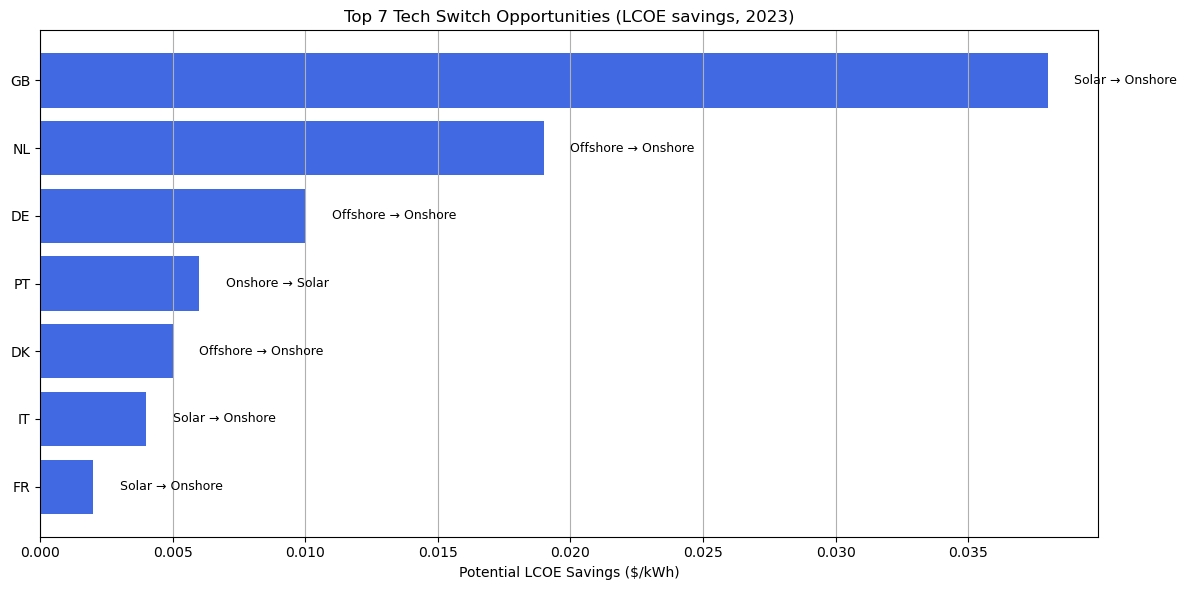

In [203]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_excel("C:/Users/victoriadx/Desktop/Victoria/01_Studies/TFM/datos/LCOE_info.xlsx")
df.columns = df.columns.str.lower()
df['lcoe'] = pd.to_numeric(df['lcoe'], errors='coerce')

# 1. Get the minimum LCOE per country
min_lcoe_per_country = df.groupby('country')['lcoe'].min().reset_index()
min_lcoe_per_country.columns = ['country', 'min_lcoe']

# 2. Merge to get the cheapest tech info
df = df.merge(min_lcoe_per_country, on='country')

# 3. Identify the tech to switch TO
min_tech_per_country = df[df['lcoe'] == df['min_lcoe']][['country', 'tech']]
min_tech_per_country.columns = ['country', 'cheapest_tech']

# 4. Merge again to know what to switch TO
df = df.merge(min_tech_per_country, on='country')
df['savings'] = df['lcoe'] - df['min_lcoe']

# 5. Filter only opportunities where there's a saving
df_savings = df[df['savings'] > 0]

# 6. Get best switch opportunity per country
max_savings_per_country = df_savings.loc[df_savings.groupby('country')['savings'].idxmax()]

# 7. Add "switch" info
max_savings_per_country['switch'] = (
    max_savings_per_country['tech'] + " → " + max_savings_per_country['cheapest_tech']
)

# 8. Sort by savings and take top 10
top_10 = max_savings_per_country.sort_values(by='savings', ascending=False).head(10)

# 9. Plot
plt.figure(figsize=(12, 6))
bars = plt.barh(top_10['country'], top_10['savings'], color='royalblue')

# Add text labels for switches
for bar, label in zip(bars, top_10['switch']):
    width = bar.get_width()
    plt.text(width + 0.001, bar.get_y() + bar.get_height() / 2, label,
             va='center', fontsize=9)

plt.xlabel("Potential LCOE Savings ($/kWh)")
plt.title("Top 7 Tech Switch Opportunities (LCOE savings, 2023)")
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.tight_layout()
plt.savefig("C:/Users/victoriadx/Desktop/Victoria/01_Studies/TFM/datos/figures/lcoe_boxplot_savings.png", dpi=300, bbox_inches='tight')
plt.show()


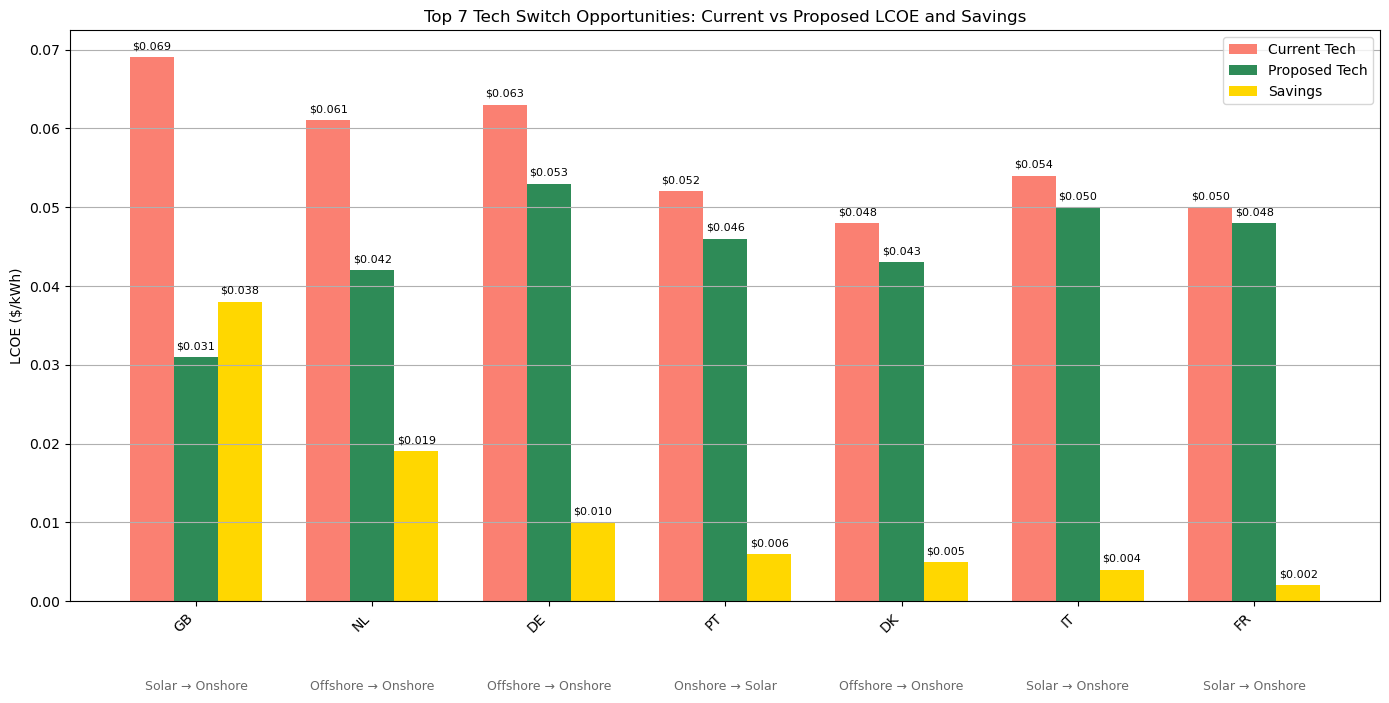

In [204]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
df = pd.read_excel("C:/Users/victoriadx/Desktop/Victoria/01_Studies/TFM/datos/LCOE_info.xlsx")
df.columns = df.columns.str.lower()
df['lcoe'] = pd.to_numeric(df['lcoe'], errors='coerce')

# 1. Get the minimum LCOE per country
min_lcoe_per_country = df.groupby('country')['lcoe'].min().reset_index()
min_lcoe_per_country.columns = ['country', 'min_lcoe']

# 2. Merge to get cheapest tech info
df = df.merge(min_lcoe_per_country, on='country')
min_tech_per_country = df[df['lcoe'] == df['min_lcoe']][['country', 'tech']]
min_tech_per_country.columns = ['country', 'cheapest_tech']
df = df.merge(min_tech_per_country, on='country')
df['savings'] = df['lcoe'] - df['min_lcoe']

# 3. Filter only switch opportunities
df_savings = df[df['savings'] > 0]
max_savings_per_country = df_savings.loc[df_savings.groupby('country')['savings'].idxmax()]

# 4. Top 10 by savings
top_10 = max_savings_per_country.sort_values(by='savings', ascending=False).reset_index(drop=True).head(10)

# Create switch labels
top_10['switch'] = top_10['tech'] + " → " + top_10['cheapest_tech']

# Plot setup
countries = top_10['country']
x = np.arange(len(countries))
width = 0.25

fig, ax = plt.subplots(figsize=(14, 7))

# Bars
bars_current = ax.bar(x - width, top_10['lcoe'], width, color='salmon', label='Current Tech')
bars_proposed = ax.bar(x, top_10['min_lcoe'], width, color='seagreen', label='Proposed Tech')
bars_savings = ax.bar(x + width, top_10['savings'], width, color='gold', label='Savings')

# Add numeric labels
for i in range(len(top_10)):
    ax.text(x[i] - width, top_10['lcoe'][i] + 0.001, f"${top_10['lcoe'][i]:.3f}", ha='center', fontsize=8)
    ax.text(x[i], top_10['min_lcoe'][i] + 0.001, f"${top_10['min_lcoe'][i]:.3f}", ha='center', fontsize=8)
    ax.text(x[i] + width, top_10['savings'][i] + 0.001, f"${top_10['savings'][i]:.3f}", ha='center', fontsize=8)

# Add switch text below x-axis labels
for i, label in enumerate(top_10['switch']):
    ax.text(x[i], -0.01, label, ha='center', va='top', fontsize=9, rotation=0, color='dimgray')

# Axes & labels
ax.set_ylabel('LCOE ($/kWh)')
ax.set_title('Top 7 Tech Switch Opportunities: Current vs Proposed LCOE and Savings')
ax.set_xticks(x)
ax.set_xticklabels(countries, rotation=45, ha='right')
ax.legend(loc='upper right')
ax.grid(axis='y')

# Adjust plot to make space for switch labels
plt.subplots_adjust(bottom=0.2)

# Save & show
plt.tight_layout()
plt.savefig("C:/Users/victoriadx/Desktop/Victoria/01_Studies/TFM/datos/figures/lcoe_switch_full_bars_with_labels.png", dpi=300)
plt.show()


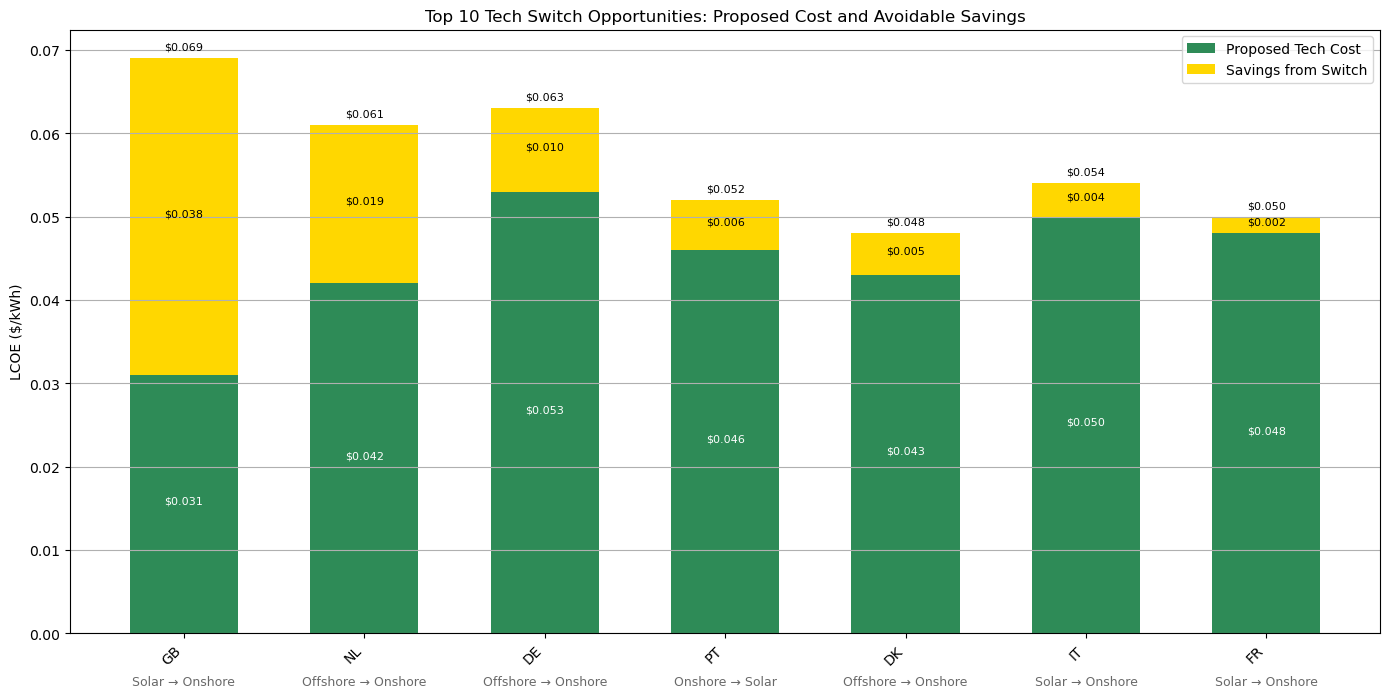

In [205]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
df = pd.read_excel("C:/Users/victoriadx/Desktop/Victoria/01_Studies/TFM/datos/LCOE_info.xlsx")
df.columns = df.columns.str.lower()
df['lcoe'] = pd.to_numeric(df['lcoe'], errors='coerce')

# Get minimum LCOE per country
min_lcoe_per_country = df.groupby('country')['lcoe'].min().reset_index()
min_lcoe_per_country.columns = ['country', 'min_lcoe']

# Merge to get cheapest tech info
df = df.merge(min_lcoe_per_country, on='country')
min_tech_per_country = df[df['lcoe'] == df['min_lcoe']][['country', 'tech']]
min_tech_per_country.columns = ['country', 'cheapest_tech']
df = df.merge(min_tech_per_country, on='country')
df['savings'] = df['lcoe'] - df['min_lcoe']

# Filter valid switches
df_savings = df[df['savings'] > 0]
max_savings_per_country = df_savings.loc[df_savings.groupby('country')['savings'].idxmax()]

# Top 10 by savings
top_10 = max_savings_per_country.sort_values(by='savings', ascending=False).reset_index(drop=True).head(10)
top_10['switch'] = top_10['tech'] + " → " + top_10['cheapest_tech']

# Plot
x = np.arange(len(top_10))
width = 0.6

fig, ax = plt.subplots(figsize=(14, 7))

# Stacked bars: bottom = cheapest tech, top = savings
bar_base = ax.bar(x, top_10['min_lcoe'], width, label='Proposed Tech Cost', color='seagreen')
bar_savings = ax.bar(x, top_10['savings'], width, bottom=top_10['min_lcoe'], label='Savings from Switch', color='gold')

# Labels for current total cost (min + savings)
for i in range(len(top_10)):
    total_cost = top_10['lcoe'][i]
    ax.text(x[i], total_cost + 0.001, f"${total_cost:.3f}", ha='center', fontsize=8)
    ax.text(x[i], top_10['min_lcoe'][i] / 2, f"${top_10['min_lcoe'][i]:.3f}", ha='center', fontsize=8, color='white')
    ax.text(x[i], top_10['min_lcoe'][i] + top_10['savings'][i] / 2, f"${top_10['savings'][i]:.3f}", ha='center', fontsize=8)

# Add switch labels below
for i in range(len(top_10)):
    ax.text(x[i], -0.005, top_10['switch'][i], ha='center', va='top', fontsize=9, color='dimgray')

# Formatting
ax.set_ylabel('LCOE ($/kWh)')
ax.set_title('Top 10 Tech Switch Opportunities: Proposed Cost and Avoidable Savings')
ax.set_xticks(x)
ax.set_xticklabels(top_10['country'], rotation=45, ha='right')
ax.legend()
ax.grid(axis='y')

plt.subplots_adjust(bottom=0.2)
plt.tight_layout()
plt.savefig("C:/Users/victoriadx/Desktop/Victoria/01_Studies/TFM/datos/figures/lcoe_switch_stacked_savings.png", dpi=300)
plt.show()


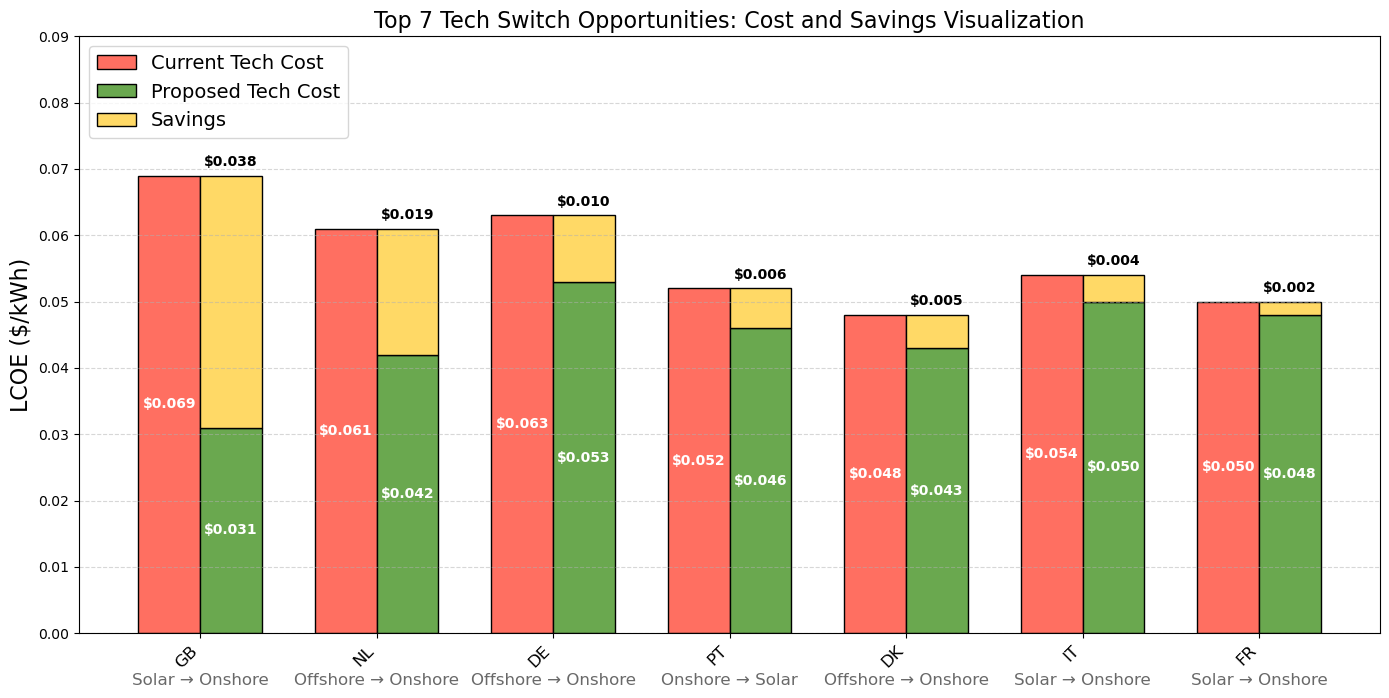

In [206]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load and process data
df = pd.read_excel("C:/Users/victoriadx/Desktop/Victoria/01_Studies/TFM/datos/LCOE_info.xlsx")
df.columns = df.columns.str.lower()
df['lcoe'] = pd.to_numeric(df['lcoe'], errors='coerce')

# Find minimum LCOE per country
min_lcoe_per_country = df.groupby('country')['lcoe'].min().reset_index()
min_lcoe_per_country.columns = ['country', 'min_lcoe']

# Merge with original data
df = df.merge(min_lcoe_per_country, on='country')

# Get cheapest tech info
min_tech_per_country = df[df['lcoe'] == df['min_lcoe']][['country', 'tech']]
min_tech_per_country.columns = ['country', 'cheapest_tech']

# Merge again and calculate savings
df = df.merge(min_tech_per_country, on='country')
df['savings'] = df['lcoe'] - df['min_lcoe']

# Filter and get top 10 opportunities
df_savings = df[df['savings'] > 0]
max_savings_per_country = df_savings.loc[df_savings.groupby('country')['savings'].idxmax()]
top_10 = max_savings_per_country.sort_values(by='savings', ascending=False).reset_index(drop=True).head(10)
top_10['switch'] = top_10['tech'] + " → " + top_10['cheapest_tech']

# Plot setup
x = np.arange(len(top_10))
width = 0.35
fig, ax = plt.subplots(figsize=(14, 7))

# Colors
current_color = '#FF6F61'  # Red
proposed_color = '#6AA84F'  # Green
savings_color = '#FFD966'  # Yellow

# Plot current tech cost
bar_current = ax.bar(x - width / 2, top_10['lcoe'], width, label='Current Tech Cost', color=current_color, edgecolor='black')

# Plot proposed tech cost
bar_proposed = ax.bar(x + width / 2, top_10['min_lcoe'], width, label='Proposed Tech Cost', color=proposed_color, edgecolor='black')

# Plot savings stacked on top of proposed
bar_savings = ax.bar(x + width / 2, top_10['savings'], width,
                     bottom=top_10['min_lcoe'], label='Savings', color=savings_color, edgecolor='black')

# Add labels
for i in range(len(top_10)):
    # Label on top of stacked bar
    total_height = top_10['min_lcoe'][i] + top_10['savings'][i]
    ax.text(x[i] + width / 2, total_height + 0.001, f"${top_10['savings'][i]:.3f}",
            ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

    # Label inside current tech bar
    ax.text(x[i] - width / 2, top_10['lcoe'][i] / 2, f"${top_10['lcoe'][i]:.3f}", 
            ha='center', va='center', fontsize=10, color='white', fontweight='bold')

    # Label inside proposed tech bar
    ax.text(x[i] + width / 2, top_10['min_lcoe'][i] / 2, f"${top_10['min_lcoe'][i]:.3f}", 
            ha='center', va='center', fontsize=10, color='white', fontweight='bold')

    # Add switch info below x-axis
    ax.text(x[i], -0.006, top_10['switch'][i], ha='center', va='top', fontsize=12, color='dimgray', rotation=0)

# Customize plot
ax.set_ylabel('LCOE ($/kWh)', fontsize=16)
ax.set_title('Top 7 Tech Switch Opportunities: Cost and Savings Visualization', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(top_10['country'], rotation=45, ha='right', fontsize=12)
ax.legend(loc='upper left', frameon=True, fontsize=14)
ax.set_ylim(0, 0.09)  # <-- Adjusted y-axis limit for zoom
ax.grid(axis='y', linestyle='--', alpha=0.5)
plt.subplots_adjust(bottom=0.2)
plt.tight_layout()

# Save and show
plt.savefig("C:/Users/victoriadx/Desktop/Victoria/01_Studies/TFM/datos/figures/lcoe_stacked_savings_zoomed.png", dpi=300)
plt.show()


In [207]:
import pandas as pd

# Load the CSV file
mean_demand = pd.read_csv("C:/Users/victoriadx/Desktop/Victoria/01_Studies/TFM/datos/mean_demand_df.csv")

# Show the data
print(mean_demand)

   country  demand
0       AT    7025
1       BE    9607
2       BG    4282
3       CH    7083
4       CY     494
5       CZ    7289
6       DE   59290
7       DK    3886
8       EE     932
9       ES   27779
10      FI    9366
11      FR   52177
12      GB   34924
13      GR    5740
14      HR    2030
15      HU    4900
16      IT   32607
17      NL   12476
18      IE    4272
19      PL   19118
20      PT    5701
21      LT    1345
22      RO    6616
23      LV     806
24      SI    1508
25      MK     760
26      SK    3207
27      NO   15254
28      SE   15420


In [208]:
mean_demand_array = mean_demand['demand'].to_numpy()
print(mean_demand_array)

[ 7025  9607  4282  7083   494  7289 59290  3886   932 27779  9366 52177
 34924  5740  2030  4900 32607 12476  4272 19118  5701  1345  6616   806
  1508   760  3207 15254 15420]


In [209]:
import pandas as pd

# Load the CSV file
q3_demand = pd.read_csv("C:/Users/victoriadx/Desktop/Victoria/01_Studies/TFM/datos/q3_demand_df.csv")

# Show the data
print(q3_demand)

   country  demand
0       AT    8007
1       BE   10630
2       BG    4780
3       CH    7745
4       CY     580
5       CZ    8185
6       DE   67748
7       DK    4446
8       EE    1069
9       ES   31223
10      FI   10459
11      FR   59693
12      GB   40755
13      GR    6496
14      HR    2313
15      HU    5424
16      IT   38825
17      NL   14028
18      IE    4888
19      PL   21590
20      PT    6431
21      LT    1536
22      RO    7329
23      LV     935
24      SI    1719
25      MK     911
26      SK    3550
27      NO   17739
28      SE   17797


In [210]:
q3_demand_array = q3_demand['demand'].to_numpy()
print(q3_demand_array)

[ 8007 10630  4780  7745   580  8185 67748  4446  1069 31223 10459 59693
 40755  6496  2313  5424 38825 14028  4888 21590  6431  1536  7329   935
  1719   911  3550 17739 17797]


In [237]:
#analysis of average demand
import numpy as np
import pandas as pd
from scipy.optimize import minimize

# Example data (replace with actual data)
countries = ['AT', 'BE', 'BG','CH','CY','CZ','DE','DK','EE','ES','FI','FR','GB','GR','HR','HU','IT','NL','IE','PL','PT','LT','RO','LV','SI','MK','SK','NO','SE']
#save all results in data frame
import numpy as np
import pandas as pd
from scipy.optimize import minimize

# Example data (replace with actual data)
countries = ['AT', 'BE', 'BG','CH','CY','CZ','DE','DK','EE','ES','FI','FR','GB','GR','HR','HU','IT','NL','IE','PL','PT','LT','RO','LV','SI','MK','SK','NO','SE']
energies = ['Wind', 'Solar']
n_countries = len(countries)
n_energies = len(energies)

# Replace these with your actual data
CF = matrix_CF        # Shape: (n_countries, n_energies)
mean_demand = mean_demand_array   # Shape: (n_countries,)
X_initial = np.ones(n_countries * n_energies)

# Define bounds
bounds = [(0, None)] * (n_countries * n_energies)

# Create array of target CF values
target_CFs = np.arange(0.08554407, 0.34812735, 0.08)  # will iterate over desired target CF

# List to store all results DataFrames
all_results = []

for target_CF in target_CFs:
    print(f"\n{'='*60}\nTarget Capacity Factor: {target_CF:.2f}\n{'='*60}")

    # Define the constraint function dynamically for each target_CF
    def con_target_CF(X):
        aux = (CF - target_CF) * X.reshape((n_countries, n_energies))
        return np.sum(aux)

    cons = {'type': 'ineq', 'fun': con_target_CF}

    # Define the objective function
    def objective(X):
        energy_produced = CF * X.reshape((n_countries, n_energies))
        return np.sum((energy_produced.sum(axis=1) - mean_demand)**2)

    # Run optimization
    result = minimize(objective, X_initial, bounds=bounds, constraints=cons, method='trust-constr',
                      options={'maxiter': 2000, 'verbose': 0})


    if result.success:
        optimized_X = result.x.reshape((n_countries, n_energies))
        print("Optimization Successful!")
        print("Optimized Installed Capacities (MW):")
        for i, country in enumerate(countries):
            wind = optimized_X[i, 0]
            solar = optimized_X[i, 1]
            print(f"{country}: Wind = {wind:.2f}, Solar = {solar:.2f}")

        # Create and save the installed capacities DataFrame
        df_capacities = pd.DataFrame({
            'country': countries,
            'wind': optimized_X[:, 0],
            'solar': optimized_X[:, 1]
        })
    
        if np.isclose(target_CF, 0.09, atol=0.01):
            df_capacities_009 = df_capacities.copy()
        elif np.isclose(target_CF, 0.17, atol=0.01):
            df_capacities_017 = df_capacities.copy()
        elif np.isclose(target_CF, 0.33, atol=0.01):
            df_capacities_033 = df_capacities.copy()
        
        # Calculate RMSE per country
        energy_produced = CF * optimized_X
        # Since squared error, RMSE is just the absolute error in this context (or np.sqrt for each value)
        error_per_country = (energy_produced.sum(axis=1) - mean_demand)**2
        rmse_per_country = np.sqrt(error_per_country)

        print("\nObjective Function Value per Country (Absolute Error):")
        for i, country in enumerate(countries):
            print(f"{country}: {rmse_per_country[i]:,.2f}")

        # Build a DataFrame with the results for this target_CF
        df_result_mean = pd.DataFrame({
            'country': countries,
            'target_cf': [target_CF] * n_countries,
            'rmse': rmse_per_country
        })
        # Append this DataFrame to the list
        all_results.append(df_result_mean)
    else:
        print("Optimization Failed:", result.message)

# After looping through all target_CFs, concatenate all individual DataFrames
df_all_results_mean = pd.concat(all_results, ignore_index=True)
print("\nCombined Results DataFrame:")
print(df_all_results_mean)

# Optionally, save the combined results to CSV
#df_all_results.to_csv("rmse_vs_target_cf_by_country.csv", index=False)



Target Capacity Factor: 0.09
Optimization Successful!
Optimized Installed Capacities (MW):
AT: Wind = 20445.61, Solar = 11991.76
BE: Wind = 29217.80, Solar = 14423.18
BG: Wind = 12628.91, Solar = 9087.60
CH: Wind = 22379.04, Solar = 19500.48
CY: Wind = 1477.52, Solar = 1662.09
CZ: Wind = 23673.75, Solar = 14905.87
DE: Wind = 209224.55, Solar = 126319.76
DK: Wind = 11273.06, Solar = 5420.28
EE: Wind = 3139.45, Solar = 1532.88
ES: Wind = 74173.13, Solar = 47878.61
FI: Wind = 26657.43, Solar = 9282.53
FR: Wind = 159507.18, Solar = 91791.34
GB: Wind = 95546.72, Solar = 33296.12
GR: Wind = 15444.24, Solar = 10793.31
HR: Wind = 7028.08, Solar = 7317.94
HU: Wind = 14760.01, Solar = 9257.42
IT: Wind = 96929.50, Solar = 37749.67
NL: Wind = 38940.26, Solar = 31413.87
IE: Wind = 13285.88, Solar = 5971.01
PL: Wind = 63805.96, Solar = 29188.03
PT: Wind = 17931.97, Solar = 24657.96
LT: Wind = 3995.84, Solar = 2599.39
RO: Wind = 20702.58, Solar = 8758.79
LV: Wind = 2450.09, Solar = 1661.69
SI: Wind 

C:\Users\victoriadx\Anaconda3\lib\site-packages\scipy\optimize\_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


Optimization Successful!
Optimized Installed Capacities (MW):
AT: Wind = 29467.19, Solar = 0.00
BE: Wind = 39301.65, Solar = 0.00
BG: Wind = 15310.00, Solar = 0.00
CH: Wind = 17665.90, Solar = 0.00
CY: Wind = 0.00, Solar = 0.00
CZ: Wind = 27858.36, Solar = 0.00
DE: Wind = 275231.11, Solar = 0.00
DK: Wind = 19271.82, Solar = 0.00
EE: Wind = 3634.10, Solar = 0.00
ES: Wind = 107543.76, Solar = 0.00
FI: Wind = 37355.25, Solar = 0.00
FR: Wind = 211708.13, Solar = 0.00
GB: Wind = 114909.11, Solar = 0.00
GR: Wind = 24336.70, Solar = 0.00
HR: Wind = 0.00, Solar = 0.00
HU: Wind = 19894.41, Solar = 0.00
IT: Wind = 117046.87, Solar = 0.00
NL: Wind = 49336.65, Solar = 0.00
IE: Wind = 19540.59, Solar = 0.00
PL: Wind = 77246.13, Solar = 0.00
PT: Wind = 0.00, Solar = 0.00
LT: Wind = 7184.10, Solar = 0.00
RO: Wind = 28442.90, Solar = 0.00
LV: Wind = 3560.17, Solar = 0.00
SI: Wind = 9327.95, Solar = 0.00
MK: Wind = 2605.50, Solar = 0.00
SK: Wind = 15119.07, Solar = 0.00
NO: Wind = 0.00, Solar = 50121.0

In [238]:
print("\nInstalled Capacities for Target CF = 0.09")
print(df_capacities_009)

print("\nInstalled Capacities for Target CF = 0.17")
print(df_capacities_017)

print("\nInstalled Capacities for Target CF = 0.33")
print(df_capacities_033)



Installed Capacities for Target CF = 0.09
   country           wind          solar
0       AT   20445.606624   11991.763739
1       BE   29217.804690   14423.181251
2       BG   12628.912967    9087.597809
3       CH   22379.044205   19500.484043
4       CY    1477.521090    1662.085173
5       CZ   23673.750685   14905.870505
6       DE  209224.551853  126319.759070
7       DK   11273.057761    5420.276776
8       EE    3139.447708    1532.880769
9       ES   74173.125241   47878.612321
10      FI   26657.431070    9282.534470
11      FR  159507.181953   91791.340638
12      GB   95546.716430   33296.117224
13      GR   15444.239337   10793.306129
14      HR    7028.077128    7317.937201
15      HU   14760.011479    9257.420351
16      IT   96929.503157   37749.666538
17      NL   38940.259350   31413.873480
18      IE   13285.882587    5971.011283
19      PL   63805.960733   29188.027316
20      PT   17931.968911   24657.964968
21      LT    3995.838211    2599.386944
22      RO   2

In [250]:
#calculated generated energy 

# Multiply wind and solar values by the corresponding target CF
df_capacities_009_adjusted = df_capacities_009.copy()
df_capacities_009_adjusted['wind'] = df_capacities_009_adjusted['wind'] * 0.09
df_capacities_009_adjusted['solar'] = df_capacities_009_adjusted['solar'] * 0.09

df_capacities_017_adjusted = df_capacities_017.copy()
df_capacities_017_adjusted['wind'] = df_capacities_017_adjusted['wind'] * 0.17
df_capacities_017_adjusted['solar'] = df_capacities_017_adjusted['solar'] * 0.17

df_capacities_033_adjusted = df_capacities_033.copy()
df_capacities_033_adjusted['wind'] = df_capacities_033_adjusted['wind'] * 0.33
df_capacities_033_adjusted['solar'] = df_capacities_033_adjusted['solar'] * 0.33

print("\nAdjusted Installed Capacities for Target CF = 0.09")
print(df_capacities_009_adjusted)

print("\nAdjusted Installed Capacities for Target CF = 0.17")
print(df_capacities_017_adjusted)

print("\nAdjusted Installed Capacities for Target CF = 0.33")
print(df_capacities_033_adjusted)



Adjusted Installed Capacities for Target CF = 0.09
   country          wind         solar
0       AT   1840.104596   1079.258737
1       BE   2629.602422   1298.086313
2       BG   1136.602167    817.883803
3       CH   2014.113978   1755.043564
4       CY    132.976898    149.587666
5       CZ   2130.637562   1341.528345
6       DE  18830.209667  11368.778316
7       DK   1014.575198    487.824910
8       EE    282.550294    137.959269
9       ES   6675.581272   4309.075109
10      FI   2399.168796    835.428102
11      FR  14355.646376   8261.220657
12      GB   8599.204479   2996.650550
13      GR   1389.981540    971.397552
14      HR    632.526942    658.614348
15      HU   1328.401033    833.167832
16      IT   8723.655284   3397.469988
17      NL   3504.623342   2827.248613
18      IE   1195.729433    537.391015
19      PL   5742.536466   2626.922458
20      PT   1613.877202   2219.216847
21      LT    359.625439    233.944825
22      RO   1863.232292    788.290775
23      LV  

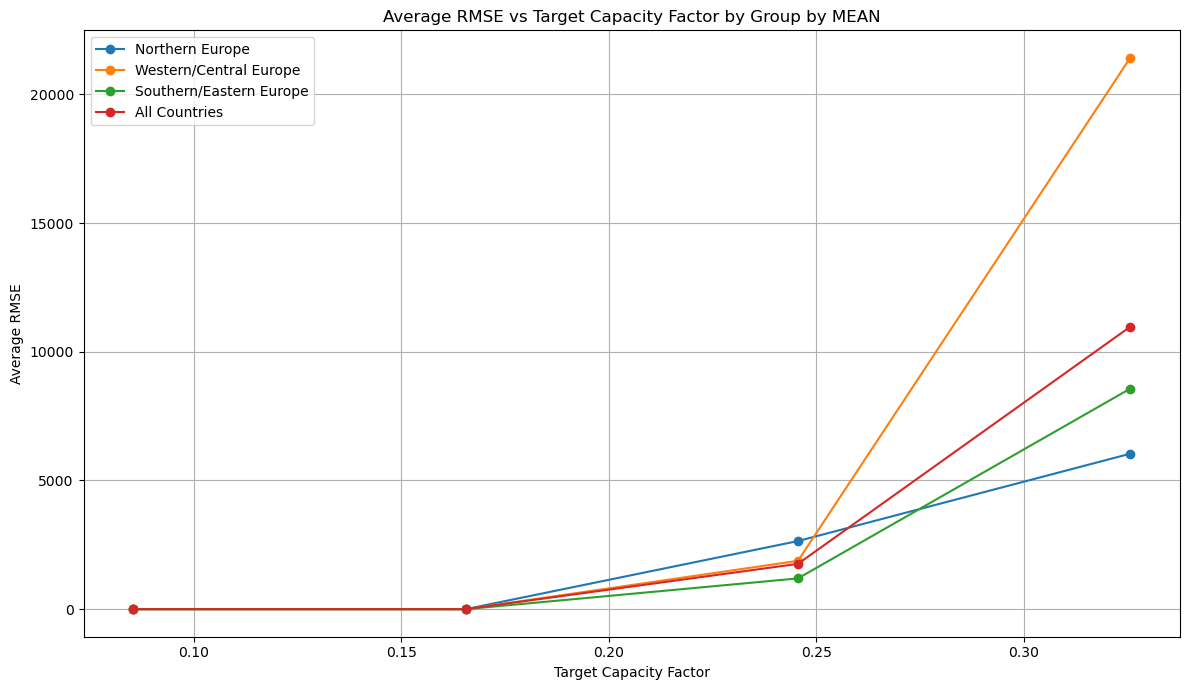

In [251]:
import pandas as pd
import matplotlib.pyplot as plt

# Define groups
group_1 = ['DK','EE','FI','IE','LT','LV','NO','SE']  # Northern
group_2 = ['AT','BE','CH','DE','FR','NL','GB']       # Western/Central
group_3 = ['BG','CY','CZ','ES','GR','HR','HU','IT','MK','PL','PT','RO','SI','SK']  # Southern/Eastern
group_4 = list(df_all_results_mean['country'].unique())    # All countries

# Group mapping
group_mapping = {
    'Northern Europe': group_1,
    'Western/Central Europe': group_2,
    'Southern/Eastern Europe': group_3,
    'All Countries': group_4
}

# Container for aggregated results
group_agg = []

# Aggregate RMSE per target CF per group
for group_name, countries in group_mapping.items():
    subset = df_all_results_mean[df_all_results_mean['country'].isin(countries)]
    agg = subset.groupby('target_cf')['rmse'].mean().reset_index()
    agg['group'] = group_name
    group_agg.append(agg)
import pandas as pd
import matplotlib.pyplot as plt

# Define groups
group_1 = ['DK','EE','FI','IE','LT','LV','NO','SE']  # Northern
group_2 = ['AT','BE','CH','DE','FR','NL','GB']       # Western/Central
group_3 = ['BG','CY','CZ','ES','GR','HR','HU','IT','MK','PL','PT','RO','SI','SK']  # Southern/Eastern
group_4 = list(df_all_results['country'].unique())    # All countries

# Group mapping
group_mapping = {
    'Northern Europe': group_1,
    'Western/Central Europe': group_2,
    'Southern/Eastern Europe': group_3,
    'All Countries': group_4
}

# Container for aggregated results
group_agg = []

# Aggregate RMSE per target CF per group
for group_name, countries in group_mapping.items():
    subset = df_all_results_mean[df_all_results_mean['country'].isin(countries)]
    agg = subset.groupby('target_cf')['rmse'].mean().reset_index()
    agg['group'] = group_name
    group_agg.append(agg)

# Combine into single DataFrame
df_group_agg = pd.concat(group_agg, ignore_index=True)

# Plotting
plt.figure(figsize=(12, 7))
for group in df_group_agg['group'].unique():
    group_data = df_group_agg[df_group_agg['group'] == group]
    plt.plot(group_data['target_cf'], group_data['rmse'], marker='o', label=group)

plt.xlabel("Target Capacity Factor")
plt.ylabel("Average RMSE")
plt.title("Average RMSE vs Target Capacity Factor by Group by MEAN")
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.savefig("C:/Users/victoriadx/Desktop/Victoria/01_Studies/TFM/datos/figures/rmse_cf_by group_boxplot.png", dpi=300, bbox_inches='tight')
plt.show()

In [252]:
#analysis of q3 demand
import numpy as np
import pandas as pd
from scipy.optimize import minimize

# Example data (replace with actual data)
countries = ['AT', 'BE', 'BG','CH','CY','CZ','DE','DK','EE','ES','FI','FR','GB','GR','HR','HU','IT','NL','IE','PL','PT','LT','RO','LV','SI','MK','SK','NO','SE']
#save all results in data frame
import numpy as np
import pandas as pd
from scipy.optimize import minimize

# Example data (replace with actual data)
countries = ['AT', 'BE', 'BG','CH','CY','CZ','DE','DK','EE','ES','FI','FR','GB','GR','HR','HU','IT','NL','IE','PL','PT','LT','RO','LV','SI','MK','SK','NO','SE']
energies = ['Wind', 'Solar']
n_countries = len(countries)
n_energies = len(energies)

# Replace these with your actual data
CF = matrix_CF        # Shape: (n_countries, n_energies)
q3_demand = q3_demand_array   # Shape: (n_countries,)
X_initial = np.ones(n_countries * n_energies)

# Define bounds
bounds = [(0, None)] * (n_countries * n_energies)

# Create array of target CF values
target_CFs = np.arange(0.08554407, 0.34812735, 0.08)  # will iterate over desired target CF

# List to store all results DataFrames
all_results = []

for target_CF in target_CFs:
    print(f"\n{'='*60}\nTarget Capacity Factor: {target_CF:.2f}\n{'='*60}")

    # Define the constraint function dynamically for each target_CF
    def con_target_CF(X):
        aux = (CF - target_CF) * X.reshape((n_countries, n_energies))
        return np.sum(aux)

    cons = {'type': 'eq', 'fun': con_target_CF}

    # Define the objective function
    def objective(X):
        energy_produced = CF * X.reshape((n_countries, n_energies))
        return np.sum((energy_produced.sum(axis=1) - q3_demand)**2)

    # Run optimization
    result = minimize(objective, X_initial, bounds=bounds, constraints=cons, method='trust-constr',
                      options={'maxiter': 2000, 'verbose': 0})


    if result.success:
        optimized_X = result.x.reshape((n_countries, n_energies))
        print("Optimization Successful!")
        print("Optimized Installed Capacities (MW):")
        for i, country in enumerate(countries):
            wind = optimized_X[i, 0]
            solar = optimized_X[i, 1]
            print(f"{country}: Wind = {wind:.2f}, Solar = {solar:.2f}")

        # Calculate RMSE per country
        energy_produced = CF * optimized_X
        # Since squared error, RMSE is just the absolute error in this context (or np.sqrt for each value)
        error_per_country = (energy_produced.sum(axis=1) - q3_demand)**2
        rmse_per_country = np.sqrt(error_per_country)

        print("\nObjective Function Value per Country (RMSE):")
        for i, country in enumerate(countries):
            print(f"{country}: {rmse_per_country[i]:,.2f}")

        # Build a DataFrame with the results for this target_CF
        df_result_q3 = pd.DataFrame({
            'country': countries,
            'target_cf': [target_CF] * n_countries,
            'rmse': rmse_per_country
        })
        # Append this DataFrame to the list
        all_results.append(df_result_q3)
    else:
        print("Optimization Failed:", result.message)

# After looping through all target_CFs, concatenate all individual DataFrames
df_all_results_q3 = pd.concat(all_results, ignore_index=True)
print("\nCombined Results DataFrame:")
print(df_all_results_q3)

# Optionally, save the combined results to CSV
#df_all_results.to_csv("rmse_vs_target_cf_by_country.csv", index=False)



Target Capacity Factor: 0.09


C:\Users\victoriadx\Anaconda3\lib\site-packages\scipy\optimize\_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


Optimization Successful!
Optimized Installed Capacities (MW):
AT: Wind = 0.00, Solar = 0.00
BE: Wind = 0.00, Solar = 0.00
BG: Wind = 0.00, Solar = 0.00
CH: Wind = 0.00, Solar = 0.00
CY: Wind = 0.00, Solar = 0.00
CZ: Wind = 0.00, Solar = 0.00
DE: Wind = 0.00, Solar = 0.02
DK: Wind = 0.00, Solar = 0.00
EE: Wind = 0.00, Solar = 0.00
ES: Wind = 0.00, Solar = 0.00
FI: Wind = 0.00, Solar = 0.00
FR: Wind = 0.00, Solar = 0.00
GB: Wind = 0.00, Solar = 0.00
GR: Wind = 0.00, Solar = 0.00
HR: Wind = 0.00, Solar = 0.00
HU: Wind = 0.00, Solar = 0.00
IT: Wind = 0.00, Solar = 0.00
NL: Wind = 0.00, Solar = 0.00
IE: Wind = 0.00, Solar = 0.00
PL: Wind = 0.00, Solar = 0.00
PT: Wind = 0.00, Solar = 0.00
LT: Wind = 0.00, Solar = 0.00
RO: Wind = 0.00, Solar = 0.00
LV: Wind = 0.00, Solar = 0.00
SI: Wind = 0.00, Solar = 0.00
MK: Wind = 0.00, Solar = 0.00
SK: Wind = 0.00, Solar = 0.00
NO: Wind = 207366.88, Solar = 0.00
SE: Wind = 0.00, Solar = 0.00

Objective Function Value per Country (RMSE):
AT: 8,007.00
BE: 

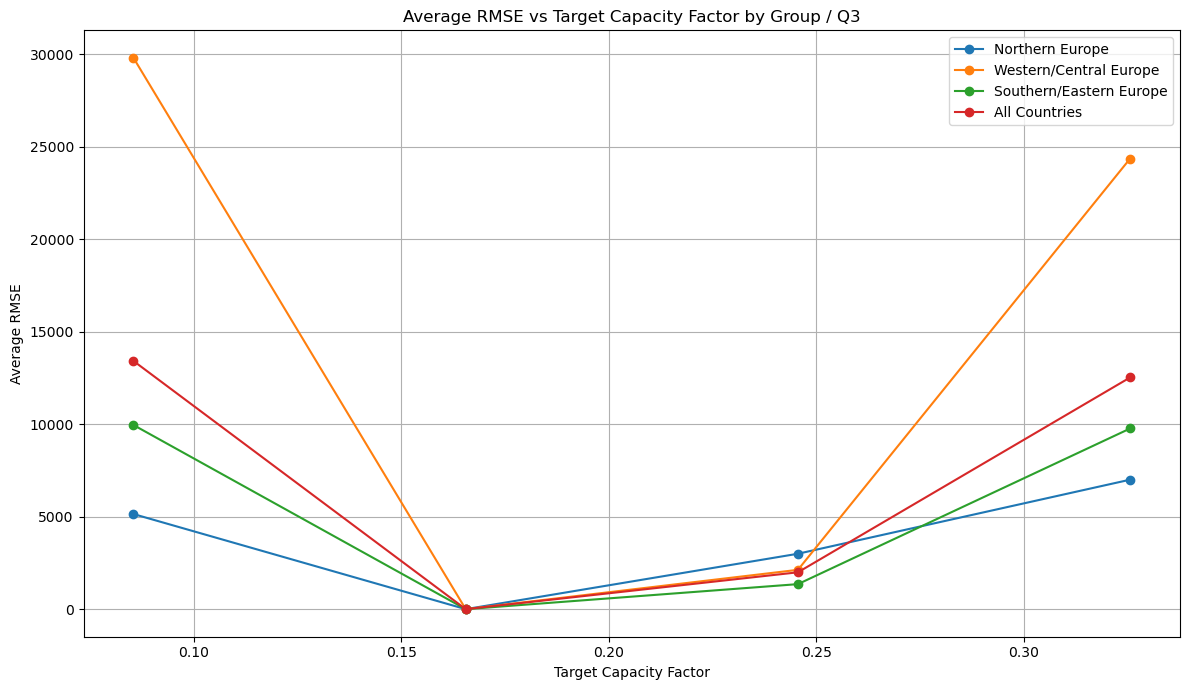

In [253]:
import pandas as pd
import matplotlib.pyplot as plt

# Define groups
group_1 = ['DK','EE','FI','IE','LT','LV','NO','SE']  # Northern
group_2 = ['AT','BE','CH','DE','FR','NL','GB']       # Western/Central
group_3 = ['BG','CY','CZ','ES','GR','HR','HU','IT','MK','PL','PT','RO','SI','SK']  # Southern/Eastern
group_4 = list(df_all_results['country'].unique())    # All countries

# Group mapping
group_mapping = {
    'Northern Europe': group_1,
    'Western/Central Europe': group_2,
    'Southern/Eastern Europe': group_3,
    'All Countries': group_4
}

# Container for aggregated results
group_agg = []

# Aggregate RMSE per target CF per group
for group_name, countries in group_mapping.items():
    subset = df_all_results_q3[df_all_results_q3['country'].isin(countries)]
    agg = subset.groupby('target_cf')['rmse'].mean().reset_index()
    agg['group'] = group_name
    group_agg.append(agg)
import pandas as pd
import matplotlib.pyplot as plt

# Define groups
group_1 = ['DK','EE','FI','IE','LT','LV','NO','SE']  # Northern
group_2 = ['AT','BE','CH','DE','FR','NL','GB']       # Western/Central
group_3 = ['BG','CY','CZ','ES','GR','HR','HU','IT','MK','PL','PT','RO','SI','SK']  # Southern/Eastern
group_4 = list(df_all_results_q3['country'].unique())    # All countries

# Group mapping
group_mapping = {
    'Northern Europe': group_1,
    'Western/Central Europe': group_2,
    'Southern/Eastern Europe': group_3,
    'All Countries': group_4
}

# Container for aggregated results
group_agg = []

# Aggregate RMSE per target CF per group
for group_name, countries in group_mapping.items():
    subset = df_all_results_q3[df_all_results_q3['country'].isin(countries)]
    agg = subset.groupby('target_cf')['rmse'].mean().reset_index()
    agg['group'] = group_name
    group_agg.append(agg)

# Combine into single DataFrame
df_group_agg = pd.concat(group_agg, ignore_index=True)

# Plotting
plt.figure(figsize=(12, 7))
for group in df_group_agg['group'].unique():
    group_data = df_group_agg[df_group_agg['group'] == group]
    plt.plot(group_data['target_cf'], group_data['rmse'], marker='o', label=group)

plt.xlabel("Target Capacity Factor")
plt.ylabel("Average RMSE")
plt.title("Average RMSE vs Target Capacity Factor by Group / Q3")
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.savefig("C:/Users/victoriadx/Desktop/Victoria/01_Studies/TFM/datos/figures/rmse_cf_by group_boxplot.png", dpi=300, bbox_inches='tight')
plt.show()


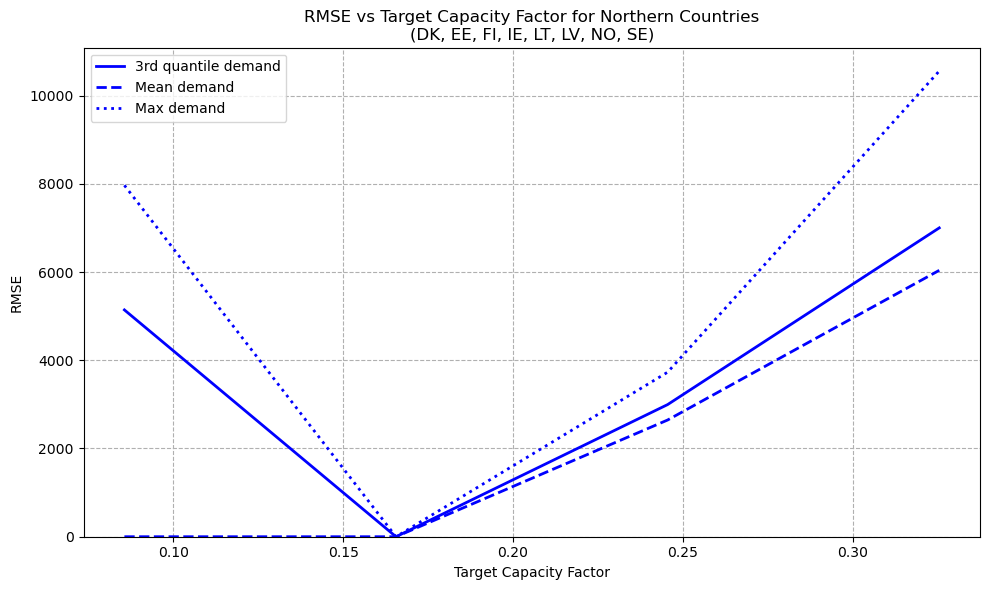

In [254]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have these dataframes loaded
# df_all_results_q3, df_all_results_mean, df_all_results

# Define Northern countries group
northern_countries = ['DK','EE','FI','IE','LT','LV','NO','SE']

# Create a figure
plt.figure(figsize=(10, 6))

# Plot each dataset for Northern countries
# Quarterly demand (solid line)
northern_q3 = df_all_results_q3[df_all_results_q3['country'].isin(northern_countries)]
northern_q3 = northern_q3.groupby('target_cf')['rmse'].mean().reset_index().sort_values('target_cf')
plt.plot(northern_q3['target_cf'], northern_q3['rmse'], 
         linestyle='-', color='blue', linewidth=2,
         label='3rd quantile demand')

# Mean demand (dashed line)
northern_mean = df_all_results_mean[df_all_results_mean['country'].isin(northern_countries)]
northern_mean = northern_mean.groupby('target_cf')['rmse'].mean().reset_index().sort_values('target_cf')
plt.plot(northern_mean['target_cf'], northern_mean['rmse'], 
         linestyle='--', color='blue', linewidth=2,
         label='Mean demand')

# Max demand (dotted line)
northern_max = df_all_results[df_all_results['country'].isin(northern_countries)]
northern_max = northern_max.groupby('target_cf')['rmse'].mean().reset_index().sort_values('target_cf')
plt.plot(northern_max['target_cf'], northern_max['rmse'], 
         linestyle=':', color='blue', linewidth=2,
         label='Max demand')

# Customize plot
plt.xlabel('Target Capacity Factor')
plt.ylabel('RMSE')
plt.title('RMSE vs Target Capacity Factor for Northern Countries\n(DK, EE, FI, IE, LT, LV, NO, SE)')
plt.ylim(bottom=0)  # This ensures y-axis starts at 0
plt.grid(True, which="both", ls="--")
plt.legend()

plt.tight_layout()
plt.show()

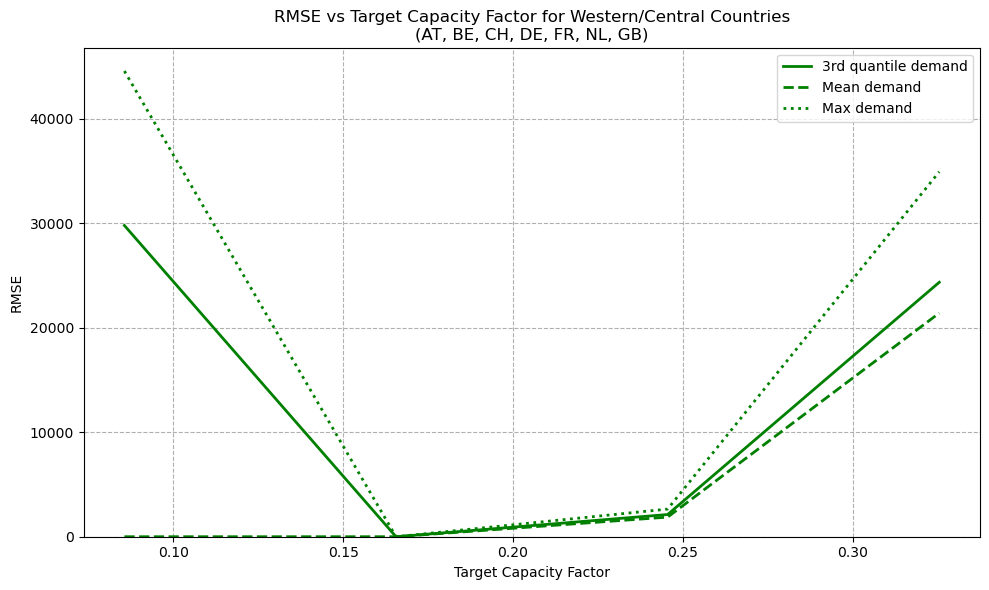

In [255]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have these dataframes loaded
# df_all_results_q3, df_all_results_mean, df_all_results

# Define Western/Central countries group
western_central_countries = ['AT','BE','CH','DE','FR','NL','GB']

# Create a figure
plt.figure(figsize=(10, 6))

# Plot each dataset for Western/Central countries
# Quarterly demand (solid line)
wc_q3 = df_all_results_q3[df_all_results_q3['country'].isin(western_central_countries)]
wc_q3 = wc_q3.groupby('target_cf')['rmse'].mean().reset_index().sort_values('target_cf')
plt.plot(wc_q3['target_cf'], wc_q3['rmse'], 
         linestyle='-', color='green', linewidth=2,
         label='3rd quantile demand')

# Mean demand (dashed line)
wc_mean = df_all_results_mean[df_all_results_mean['country'].isin(western_central_countries)]
wc_mean = wc_mean.groupby('target_cf')['rmse'].mean().reset_index().sort_values('target_cf')
plt.plot(wc_mean['target_cf'], wc_mean['rmse'], 
         linestyle='--', color='green', linewidth=2,
         label='Mean demand')

# Max demand (dotted line)
wc_max = df_all_results[df_all_results['country'].isin(western_central_countries)]
wc_max = wc_max.groupby('target_cf')['rmse'].mean().reset_index().sort_values('target_cf')
plt.plot(wc_max['target_cf'], wc_max['rmse'], 
         linestyle=':', color='green', linewidth=2,
         label='Max demand')

# Customize plot
plt.xlabel('Target Capacity Factor')
plt.ylabel('RMSE')
plt.title('RMSE vs Target Capacity Factor for Western/Central Countries\n(AT, BE, CH, DE, FR, NL, GB)')
plt.ylim(bottom=0)  # Ensure y-axis starts at 0
plt.grid(True, which="both", ls="--")
plt.legend()

plt.tight_layout()
plt.show()

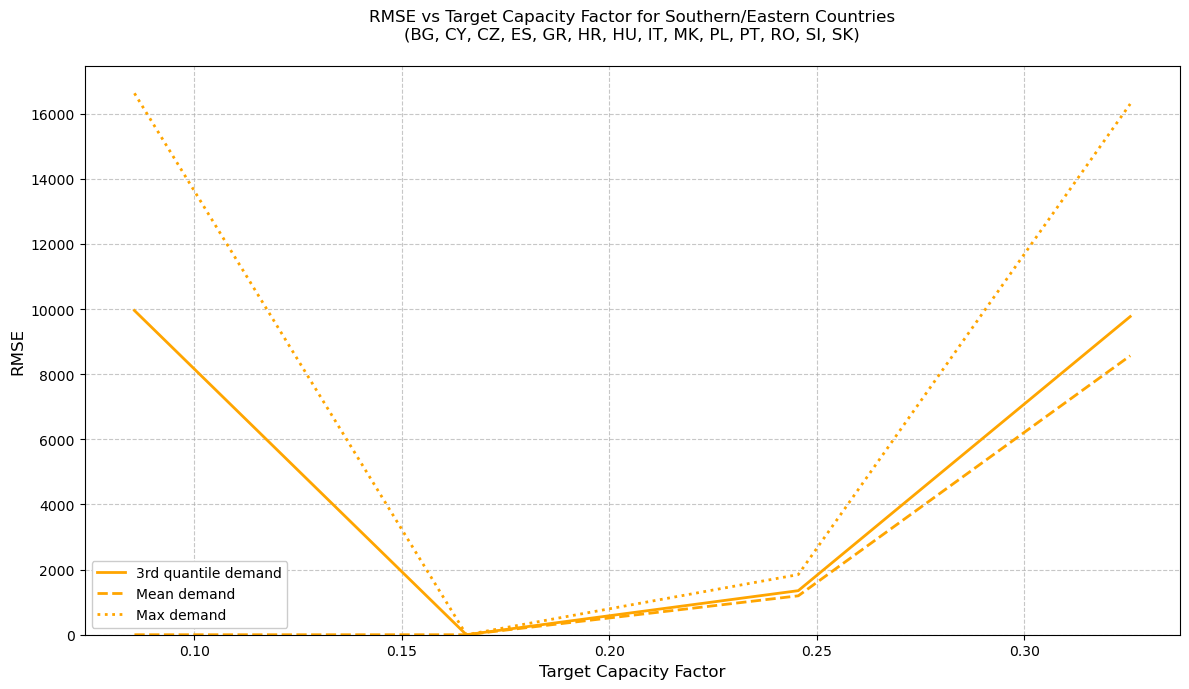

In [256]:
import matplotlib.pyplot as plt
import pandas as pd

# Define Southern/Eastern countries group
southern_eastern_countries = ['BG','CY','CZ','ES','GR','HR','HU','IT','MK','PL','PT','RO','SI','SK']

# Create a figure
plt.figure(figsize=(12, 7))  # Slightly larger to accommodate more countries in title

# Plot each dataset for Southern/Eastern countries
# Quarterly demand (solid line)
se_q3 = df_all_results_q3[df_all_results_q3['country'].isin(southern_eastern_countries)]
se_q3 = se_q3.groupby('target_cf')['rmse'].mean().reset_index().sort_values('target_cf')
plt.plot(se_q3['target_cf'], se_q3['rmse'], 
         linestyle='-', color='orange', linewidth=2,
         label='3rd quantile demand')

# Mean demand (dashed line)
se_mean = df_all_results_mean[df_all_results_mean['country'].isin(southern_eastern_countries)]
se_mean = se_mean.groupby('target_cf')['rmse'].mean().reset_index().sort_values('target_cf')
plt.plot(se_mean['target_cf'], se_mean['rmse'], 
         linestyle='--', color='orange', linewidth=2,
         label='Mean demand')

# Max demand (dotted line)
se_max = df_all_results[df_all_results['country'].isin(southern_eastern_countries)]
se_max = se_max.groupby('target_cf')['rmse'].mean().reset_index().sort_values('target_cf')
plt.plot(se_max['target_cf'], se_max['rmse'], 
         linestyle=':', color='orange', linewidth=2,
         label='Max demand')

# Customize plot
plt.xlabel('Target Capacity Factor', fontsize=12)
plt.ylabel('RMSE', fontsize=12)
plt.title('RMSE vs Target Capacity Factor for Southern/Eastern Countries\n(BG, CY, CZ, ES, GR, HR, HU, IT, MK, PL, PT, RO, SI, SK)', fontsize=12, pad=20)
plt.ylim(bottom=0)  # Ensure y-axis starts at 0

# Improve grid and legend
plt.grid(True, which="both", ls="--", alpha=0.7)
plt.legend(fontsize=10, framealpha=1)

# Adjust layout to prevent title overlap
plt.tight_layout()
plt.show()

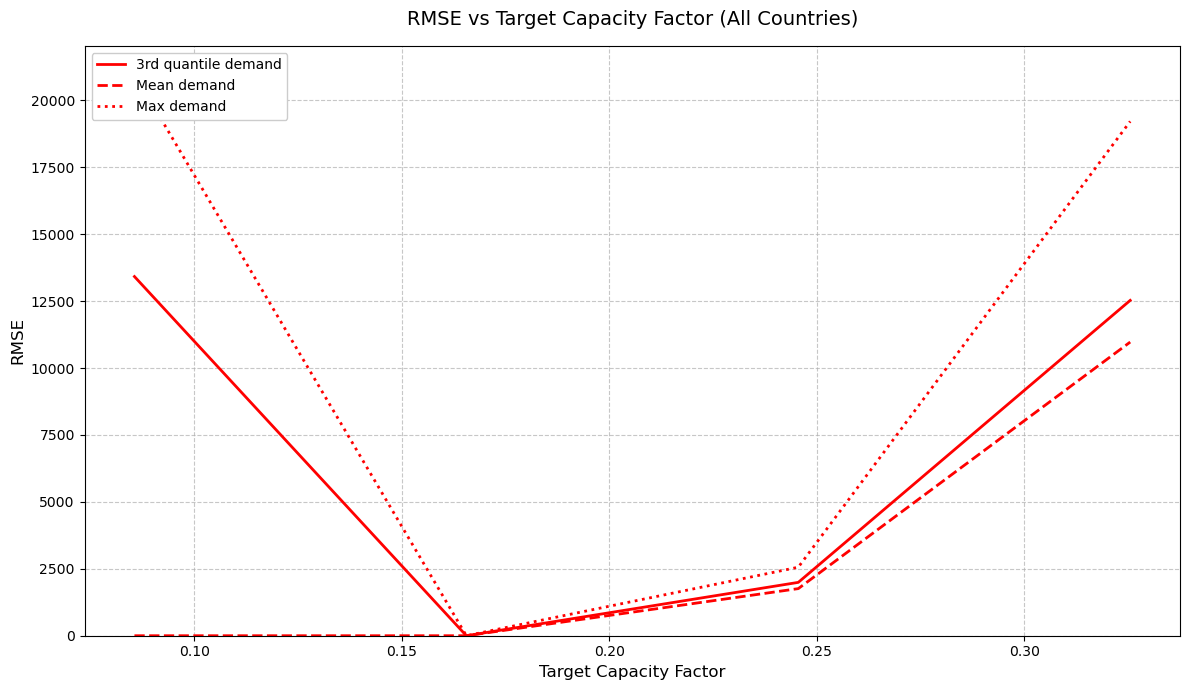

In [257]:
import matplotlib.pyplot as plt
import pandas as pd

# Get all unique countries from the dataframe
all_countries = df_all_results['country'].unique()

# Create a figure with adjusted size
plt.figure(figsize=(12, 7))

# Plot each dataset for ALL countries
# Quarterly demand (solid line)
all_q3 = df_all_results_q3.copy()  # Use all countries
all_q3 = all_q3.groupby('target_cf')['rmse'].mean().reset_index().sort_values('target_cf')
plt.plot(all_q3['target_cf'], all_q3['rmse'], 
         linestyle='-', color='red', linewidth=2,
         label='3rd quantile demand')

# Mean demand (dashed line)
all_mean = df_all_results_mean.copy()
all_mean = all_mean.groupby('target_cf')['rmse'].mean().reset_index().sort_values('target_cf')
plt.plot(all_mean['target_cf'], all_mean['rmse'], 
         linestyle='--', color='red', linewidth=2,
         label='Mean demand')

# Max demand (dotted line)
all_max = df_all_results.copy()
all_max = all_max.groupby('target_cf')['rmse'].mean().reset_index().sort_values('target_cf')
plt.plot(all_max['target_cf'], all_max['rmse'], 
         linestyle=':', color='red', linewidth=2,
         label='Max demand')

# Customize plot
plt.xlabel('Target Capacity Factor', fontsize=12)
plt.ylabel('RMSE', fontsize=12)
plt.title('RMSE vs Target Capacity Factor (All Countries)', fontsize=14, pad=15)
plt.ylim(bottom=0)  # Start y-axis at 0

# Add grid and legend
plt.grid(True, which="both", ls="--", alpha=0.7)
plt.legend(fontsize=10, framealpha=1, loc='upper left')

# Adjust layout
plt.tight_layout()
plt.show()

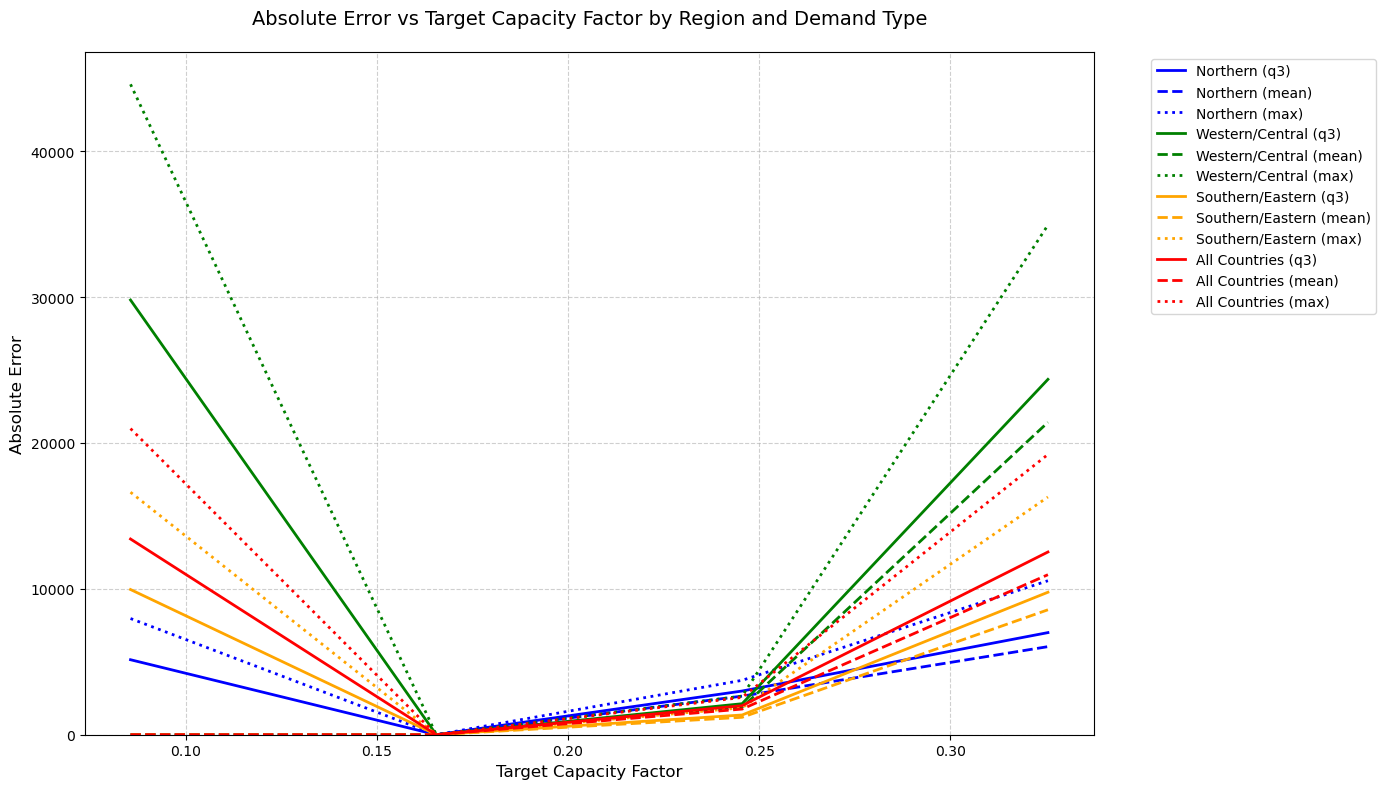

In [258]:
import matplotlib.pyplot as plt
import pandas as pd

# Define country groups
groups = {
    'Northern': ['DK','EE','FI','IE','LT','LV','NO','SE'],
    'Western/Central': ['AT','BE','CH','DE','FR','NL','GB'],
    'Southern/Eastern': ['BG','CY','CZ','ES','GR','HR','HU','IT','MK','PL','PT','RO','SI','SK'],
    'All Countries': list(df_all_results['country'].unique())
}

# Define color scheme
colors = {
    'Northern': 'blue',
    'Western/Central': 'green',
    'Southern/Eastern': 'orange',
    'All Countries': 'red'
}

# Line styles for different datasets
line_styles = {
    'q3': '-',    # solid
    'mean': '--', # dashed
    'max': ':'    # dotted
}

# Create figure
plt.figure(figsize=(14, 8))

# Plot each group and each dataset
for group_name, countries in groups.items():
    for df_name, style in line_styles.items():
        # Select the appropriate dataframe
        if df_name == 'q3':
            df = df_all_results_q3
        elif df_name == 'mean':
            df = df_all_results_mean
        else:
            df = df_all_results
        
        # Filter and aggregate data
        if group_name == 'All Countries':
            group_df = df.copy()
        else:
            group_df = df[df['country'].isin(countries)]
        
        agg_df = group_df.groupby('target_cf')['rmse'].mean().reset_index().sort_values('target_cf')
        
        # Plot the line
        plt.plot(agg_df['target_cf'], agg_df['rmse'],
                 linestyle=style,
                 color=colors[group_name],
                 label=f'{group_name} ({df_name})',
                 linewidth=2)

# Customize plot
plt.xlabel('Target Capacity Factor', fontsize=12)
plt.ylabel('Absolute Error', fontsize=12)
plt.title('Absolute Error vs Target Capacity Factor by Region and Demand Type', fontsize=14, pad=20)
plt.ylim(bottom=0)
plt.grid(True, which="both", ls="--", alpha=0.6)

# Create a comprehensive legend
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

plt.tight_layout()

# Save the figure
plt.savefig('C:/Users/victoriadx/Desktop/Victoria/01_Studies/TFM/datos/figures/absolute_error_vs_cf_by_region.png', dpi=300, bbox_inches='tight')  # Save with high resolution

plt.show()

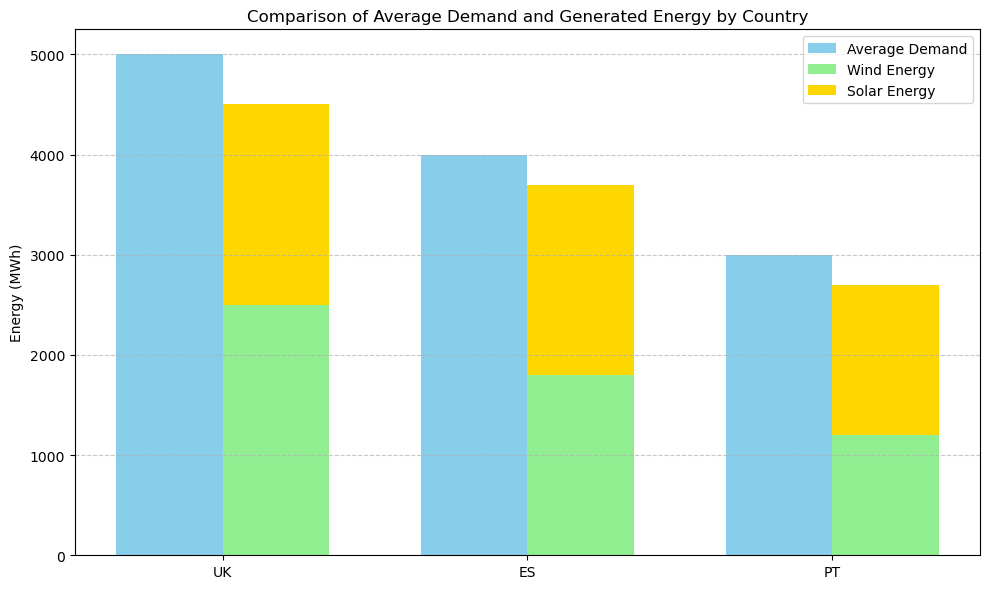

In [259]:
#sample of plot for continuation of analysis

import matplotlib.pyplot as plt
import numpy as np

# Example data
countries = ['UK', 'ES', 'PT']

avg_demand = [5000, 4000, 3000]          # Average demand per country
wind_generated = [2500, 1800, 1200]       # Wind generated energy per country
solar_generated = [2000, 1900, 1500]      # Solar generated energy per country

x = np.arange(len(countries))  # the label locations

width = 0.35  # width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Demand bars
ax.bar(x - width/2, avg_demand, width, label='Average Demand', color='skyblue')

# Generated energy bars (stacked wind + solar)
ax.bar(x + width/2, wind_generated, width, label='Wind Energy', color='lightgreen')
ax.bar(x + width/2, solar_generated, width, bottom=wind_generated, label='Solar Energy', color='gold')

# Labels and Title
ax.set_ylabel('Energy (MWh)')
ax.set_title('Comparison of Average Demand and Generated Energy by Country')
ax.set_xticks(x)
ax.set_xticklabels(countries)
ax.legend()

# Optional: Add grid
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


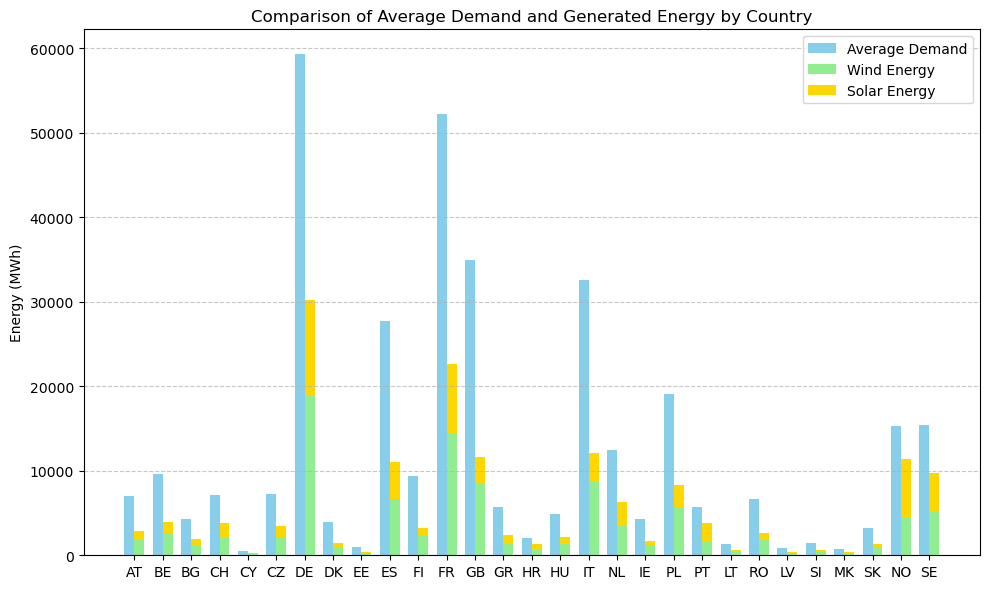

In [260]:
#applying to my real data to build the comparison plot for demand and generated energy
#target Capacity factor 0.09

import matplotlib.pyplot as plt
import numpy as np

# Example data
countries = df_capacities_009_adjusted['country'].tolist() #countries array

avg_demand = mean_demand_array          # Average demand per country
wind_generated = df_capacities_009_adjusted['wind'].tolist()       # Wind generated energy per country
solar_generated = df_capacities_009_adjusted['solar'].tolist()     # Solar generated energy per country

x = np.arange(len(countries))  # the label locations

width = 0.35  # width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Demand bars
ax.bar(x - width/2, avg_demand, width, label='Average Demand', color='skyblue')

# Generated energy bars (stacked wind + solar)
ax.bar(x + width/2, wind_generated, width, label='Wind Energy', color='lightgreen')
ax.bar(x + width/2, solar_generated, width, bottom=wind_generated, label='Solar Energy', color='gold')

# Labels and Title
ax.set_ylabel('Energy (MWh)')
ax.set_title('Comparison of Average Demand and Generated Energy by Country')
ax.set_xticks(x)
ax.set_xticklabels(countries)
ax.legend()

# Optional: Add grid
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

# Save the figure
plt.savefig('C:/Users/victoriadx/Desktop/Victoria/01_Studies/TFM/datos/figures/average_demand_vs_generated_energy_009.png', dpi=300, bbox_inches='tight')  # Save with high resolution

plt.show()

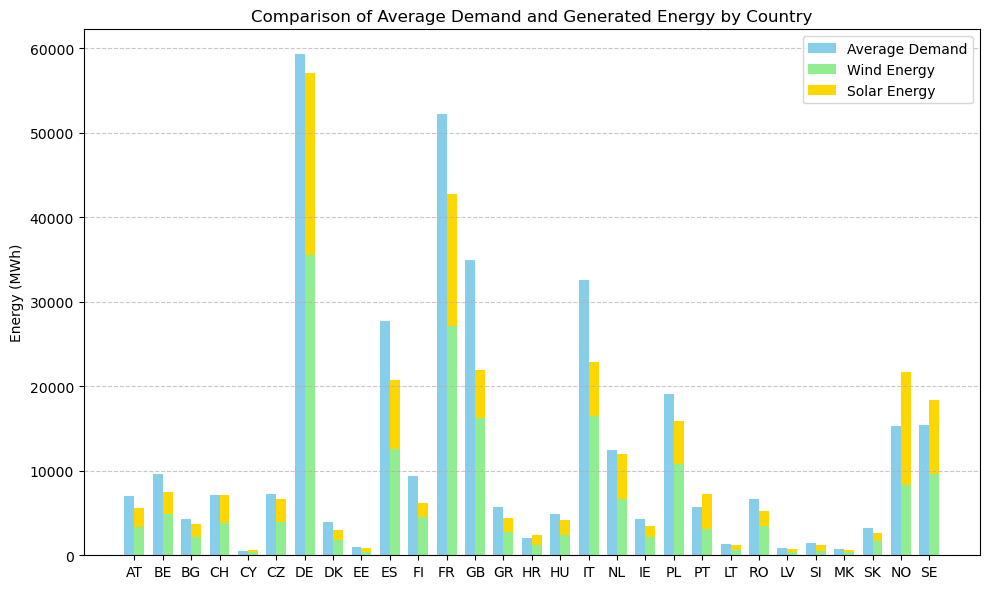

In [261]:
#applying to my real data to build the comparison plot for demand and generated energy
#target Capacity factor 0.17

import matplotlib.pyplot as plt
import numpy as np

# Example data
countries = df_capacities_017_adjusted['country'].tolist() #countries array

avg_demand = mean_demand_array          # Average demand per country
wind_generated = df_capacities_017_adjusted['wind'].tolist()       # Wind generated energy per country
solar_generated = df_capacities_017_adjusted['solar'].tolist()     # Solar generated energy per country

x = np.arange(len(countries))  # the label locations

width = 0.35  # width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Demand bars
ax.bar(x - width/2, avg_demand, width, label='Average Demand', color='skyblue')

# Generated energy bars (stacked wind + solar)
ax.bar(x + width/2, wind_generated, width, label='Wind Energy', color='lightgreen')
ax.bar(x + width/2, solar_generated, width, bottom=wind_generated, label='Solar Energy', color='gold')

# Labels and Title
ax.set_ylabel('Energy (MWh)')
ax.set_title('Comparison of Average Demand and Generated Energy by Country')
ax.set_xticks(x)
ax.set_xticklabels(countries)
ax.legend()

# Optional: Add grid
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

# Save the figure
plt.savefig('C:/Users/victoriadx/Desktop/Victoria/01_Studies/TFM/datos/figures/average_demand_vs_generated_energy_017.png', dpi=300, bbox_inches='tight')  # Save with high resolution

plt.show()

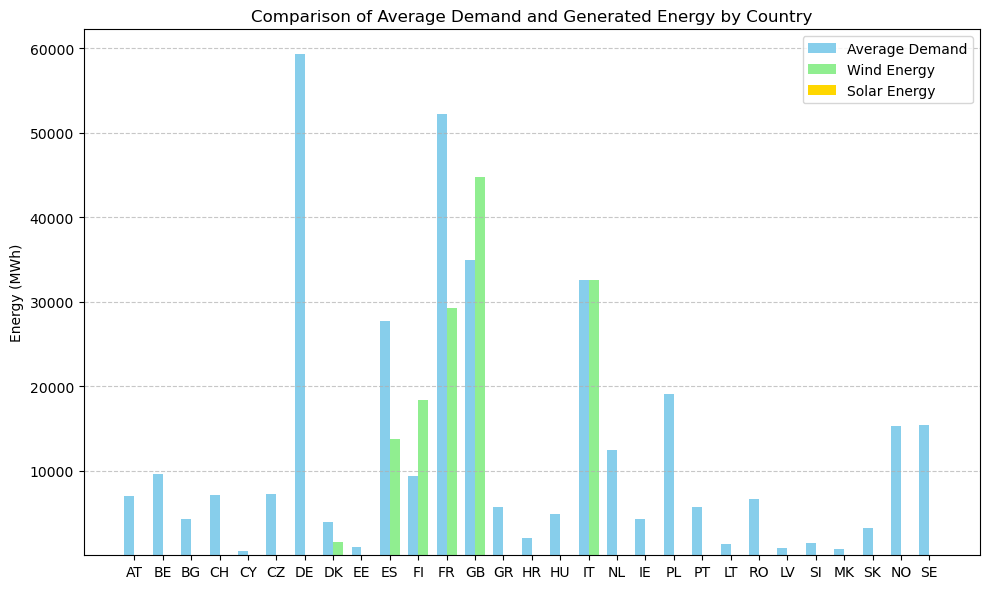

In [262]:
#applying to my real data to build the comparison plot for demand and generated energy
#target Capacity factor 0.33

import matplotlib.pyplot as plt
import numpy as np

# Example data
countries = df_capacities_030_adjusted['country'].tolist() #countries array

avg_demand = mean_demand_array          # Average demand per country
wind_generated = df_capacities_030_adjusted['wind'].tolist()       # Wind generated energy per country
solar_generated = df_capacities_030_adjusted['solar'].tolist()     # Solar generated energy per country

x = np.arange(len(countries))  # the label locations

width = 0.35  # width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Demand bars
ax.bar(x - width/2, avg_demand, width, label='Average Demand', color='skyblue')

# Generated energy bars (stacked wind + solar)
ax.bar(x + width/2, wind_generated, width, label='Wind Energy', color='lightgreen')
ax.bar(x + width/2, solar_generated, width, bottom=wind_generated, label='Solar Energy', color='gold')

# Labels and Title
ax.set_ylabel('Energy (MWh)')
ax.set_title('Comparison of Average Demand and Generated Energy by Country')
ax.set_xticks(x)
ax.set_xticklabels(countries)
ax.legend()

# Optional: Add grid
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
# Save the figure
plt.savefig('C:/Users/victoriadx/Desktop/Victoria/01_Studies/TFM/datos/figures/average_demand_vs_generated_energy_033.png', dpi=300, bbox_inches='tight')  # Save with high resolution

plt.show()